# Modelamiento

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
plt.rcParams['figure.figsize'] = (10,7)

from sklearn.metrics import mean_squared_error, mean_absolute_error, classification_report, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
#import swifter

In [4]:
df_arrests = pd.read_csv('data/df_arrests_cleaned.csv')


In [5]:
df_arrests.shape

(5108218, 11)

In [6]:
df_collisions.shape

NameError: name 'df_collisions' is not defined

In [7]:
df_complaints.shape

NameError: name 'df_complaints' is not defined

### Arrests

In [8]:
df_arrests.AGE_GROUP.value_counts()

25-44    2367249
18-24    1336872
45-64     943029
<18       417615
65+        43276
          ...   
1942           1
1024           1
1948           1
1922           1
330            1
Name: AGE_GROUP, Length: 91, dtype: int64

In [9]:
df_arrests.sample(10)

LAW_CAT_CD ARREST_BORO   JURISDICTION_CODE AGE_GROUP PERP_SEX  \
2413354  Misdemeanor       Bronx              Patrol     25-44     Male   
1285957    Violation    Brooklyn              Patrol     45-64     Male   
4570227  Misdemeanor    Brooklyn  Other jurisdiction       <18   Female   
4507683  Misdemeanor       Bronx              Patrol     25-44   Female   
2369862  Misdemeanor   Manhattan             Housing     25-44     Male   
702741   Misdemeanor       Bronx              Patrol     45-64     Male   
4349457       Felony      Queens              Patrol     25-44   Female   
1603333  Misdemeanor       Bronx  Other jurisdiction     25-44     Male   
3342516       Felony       Bronx              Patrol     45-64     Male   
248606   Misdemeanor       Bronx              Patrol     45-64     Male   

                        PERP_RACE   Latitude  Longitude  year  week  month  
2413354            White hispanic  40.813564 -73.921677  2012    52     12  
1285957            White hispanic  40.683133 -73.979165  2016     5      2  
4570227                     Black  40.610414 -73.948617  2007    40     10  
4507683                     Black  40.831701 -73.861044  2007    46     11  
2369862                     Black  40.801932 -73.935654  2013     8      2  
702741             White hispanic  40.837261 -73.924439  2018    11      3  
4349457  Asian / pacific islander  40.747633 -73.762083  2008    13      3  
1603333                     Black  40.804013 -73.878332  2015     9      2  
3342516            Black hispanic  40.817050 -73.922926  2010    35      9  
248606             Black hispanic  40.815327 -73.915865  2018    41     10

In [10]:
df_arrests.tail()

LAW_CAT_CD ARREST_BORO   JURISDICTION_CODE AGE_GROUP PERP_SEX  \
5108213       Felony   Manhattan             Transit     25-44     Male   
5108214  Misdemeanor    Brooklyn              Patrol       <18     Male   
5108215  Misdemeanor   Manhattan              Patrol     25-44     Male   
5108216       Felony      Queens              Patrol     45-64     Male   
5108217  Misdemeanor      Queens  Other jurisdiction     25-44     Male   

              PERP_RACE   Latitude  Longitude  year  week  month  
5108213  Black hispanic  40.701489 -74.012545  2020     2      1  
5108214           Black  40.708281 -73.966587  2020     1      1  
5108215           White  40.738220 -73.992012  2020     2      1  
5108216           Black  40.747777 -73.749952  2020     1      1  
5108217           Black  40.756568 -73.875932  2020     1      1

In [11]:
cond = (df_arrests['ARREST_BORO'] == 'Brooklyn') & (df_arrests['PERP_SEX'] == 'Male')

In [12]:
#df_arrests['Adulto_joven'] = np.where(df_arrests['AGE_GROUP'] == '25-44', 'Adulto joven' , 'No adulto joven')

In [13]:
df_arrests.head()

LAW_CAT_CD ARREST_BORO JURISDICTION_CODE AGE_GROUP PERP_SEX PERP_RACE  \
0       Felony   Manhattan            Patrol     45-64     Male     Black   
1       Felony   Manhattan            Patrol     25-44     Male   Unknown   
2       Felony    Brooklyn            Patrol     25-44     Male     Black   
3       Felony    Brooklyn            Patrol     25-44     Male     Black   
4  Misdemeanor    Brooklyn           Housing     45-64     Male     Black   

    Latitude  Longitude  year  week  month  
0  40.800694 -73.941109  2019     4      1  
1  40.757839 -73.991212  2019     6      2  
2  40.648650 -73.950336  2016     1      1  
3  40.674583 -73.930222  2018    46     11  
4  40.671254 -73.926714  2006    37      9

In [14]:
df_filtro = df_arrests.loc[
                (df_arrests['ARREST_BORO'] == 'Brooklyn') & (df_arrests['PERP_SEX'] == 'Male'),
               ['AGE_GROUP', 'JURISDICTION_CODE', 'PERP_RACE']]

In [15]:
#for index_row, row in df_filtro.sample(5).iterrows():
#    print(f'Indice fila: {index_row}')
#    print(f'Fila de datos: \n{row["CAR_NAME"]}\n####################\n')
#    #

In [16]:
df_arrests.AGE_GROUP.value_counts()

25-44    2367249
18-24    1336872
45-64     943029
<18       417615
65+        43276
          ...   
1942           1
1024           1
1948           1
1922           1
330            1
Name: AGE_GROUP, Length: 91, dtype: int64

In [17]:
pd.crosstab(df_arrests.ARREST_BORO, df_arrests.AGE_GROUP)

AGE_GROUP      1018  1024  1042  1048   18-24  1916  1918  1922  1928  1937  \
ARREST_BORO                                                                   
Bronx             1     0     0     0  318843     2     0     0     0     0   
Brooklyn          0     1     0     1  368559     0     0     0     0     0   
Manhattan         0     0     1     0  333663     0     1     0     0     0   
Queens            0     0     0     0  266466     0     0     1     1     1   
Staten island     0     0     0     0   49341     0     0     0     0     0   

AGE_GROUP      ...  949  951  952  954  955  956  959  965     <18  Unknown  
ARREST_BORO    ...                                                           
Bronx          ...    2    1    2    1    1    1    0    0  110770        0  
Brooklyn       ...    0    1    0    0    0    0    1    0  124456        1  
Manhattan      ...    0    1    0    0    1    0    0    0   83744        2  
Queens         ...    0    0    0    0    0    0    0    1   80336        1  
Staten island  ...    0    0    0    0    0    0    0    0   18309        1  

[5 rows x 91 columns]

In [18]:
df_arrests.rename({'ARREST_BORO': 'Borough'}, inplace = True, axis = 1)

In [19]:
#df_arrests.set_index(keys = ['year', 'month', 'Borough'], inplace = True)

In [20]:
np.unique([x[0] for x in df_arrests.index])

TypeError: 'int' object is not subscriptable

In [21]:
df_arrests = df_arrests[df_arrests.AGE_GROUP.isin(['25-44', '18-24', '45-64', '<18', '65+', 'Unknown'])]

In [22]:
df_arrests.PERP_RACE.value_counts()[:20]

Black                             2484916
White hispanic                    1325020
White                              613563
Black hispanic                     411632
Asian / pacific islander           209915
Unknown                             50345
American indian/alaskan native      11296
Other                                1359
Name: PERP_RACE, dtype: int64

In [23]:
#arrests_reduced = pd.pivot_table(df_arrests.drop(['Latitude', 'Longitude'], axis = 1), index = ['year', 'week', 'Borough'],
#                                    columns = ['LAW_CAT_CD', 'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE'], aggfunc = 'count', fill_value = 0)

In [24]:
arrests_reduced = pd.concat([pd.crosstab([df_arrests['year'], df_arrests['month'],df_arrests['week'], df_arrests['Borough']], df_arrests['LAW_CAT_CD']),
           pd.crosstab([df_arrests['year'], df_arrests['month'],df_arrests['week'], df_arrests['Borough']], df_arrests['JURISDICTION_CODE']),
           pd.crosstab([df_arrests['year'], df_arrests['month'],df_arrests['week'], df_arrests['Borough']], df_arrests['AGE_GROUP']),
           pd.crosstab([df_arrests['year'], df_arrests['month'],df_arrests['week'], df_arrests['Borough']], df_arrests['PERP_SEX']),
           pd.crosstab([df_arrests['year'], df_arrests['month'],df_arrests['week'], df_arrests['Borough']], df_arrests['PERP_RACE'])], axis = 1)

In [25]:
arrests_reduced.sample(10)

Felony  Misdemeanor  Violation  Housing  \
year month week Borough                                                  
2009 11    46   Staten island      75          192          0        0   
2014 7     31   Staten island      51           93          0        0   
2007 3     11   Manhattan         499         1433        154      147   
     4     16   Staten island      73          160          6        1   
2008 8     34   Manhattan         516         1333        150      116   
2014 1     2    Queens            408          945         96       29   
2015 1     1    Staten island      22           49          0        0   
2007 11    47   Manhattan         370         1084         99      111   
2015 6     26   Brooklyn          573         1119        151      124   
2009 8     36   Staten island      17           10          1        0   

                               Other jurisdiction  Patrol  Transit  18-24  \
year month week Borough                                                     
2009 11    46   Staten island                   7     260        0     63   
2014 7     31   Staten island                   3     141        0     35   
2007 3     11   Manhattan                      68    1593      278    505   
     4     16   Staten island                   9     229        0     71   
2008 8     34   Manhattan                      60    1564      259    506   
2014 1     2    Queens                         25    1282      113    451   
2015 1     1    Staten island                   0      71        0     10   
2007 11    47   Manhattan                      43    1209      190    342   
2015 6     26   Brooklyn                       12    1527      180    457   
2009 8     36   Staten island                   3      25        0      9   

                               25-44  45-64  ...  Female  Male  \
year month week Borough                      ...                 
2009 11    46   Staten island    116     40  ...      50   217   
2014 7     31   Staten island     71     25  ...      45    99   
2007 3     11   Manhattan       1033    398  ...     359  1727   
     4     16   Staten island    106     25  ...      44   195   
2008 8     34   Manhattan        946    417  ...     358  1641   
2014 1     2    Queens           644    234  ...     207  1242   
2015 1     1    Staten island     40     13  ...      18    53   
2007 11    47   Manhattan        762    308  ...     260  1293   
2015 6     26   Brooklyn         852    385  ...     339  1504   
2009 8     36   Staten island     13      5  ...       5    23   

                               American indian/alaskan native  \
year month week Borough                                         
2009 11    46   Staten island                               0   
2014 7     31   Staten island                               0   
2007 3     11   Manhattan                                   8   
     4     16   Staten island                               0   
2008 8     34   Manhattan                                   3   
2014 1     2    Queens                                      5   
2015 1     1    Staten island                               0   
2007 11    47   Manhattan                                   0   
2015 6     26   Brooklyn                                    2   
2009 8     36   Staten island                               0   

                               Asian / pacific islander  Black  \
year month week Borough                                          
2009 11    46   Staten island                        11    100   
2014 7     31   Staten island                         0     55   
2007 3     11   Manhattan                            86    945   
     4     16   Staten island                         4     91   
2008 8     34   Manhattan                            73    986   
2014 1     2    Queens                              157    617   
2015 1     1    Staten island                         6     20   
2007 11    47   Manhattan                        

In [26]:
#df_arrests.drop(columns = ['Adulto_joven'], axis = 1, inplace = True)

### Collisions

In [27]:
df_collisions = pd.read_csv('data/df_collisions_cleaned.csv')


In [28]:
df_collisions.sample(10)

Borough   Latitude  Longitude  Number_of_persons_injured  \
976734     Queens  40.683045 -73.751542                        0.0   
428679   Brooklyn  40.679516 -73.947525                        0.0   
300016   Brooklyn  40.653873 -74.008156                        0.0   
587019     Queens  40.664109 -73.740442                        0.0   
507370     Queens  40.728794 -73.894300                        0.0   
389686   Brooklyn  40.645596 -73.999054                        0.0   
950513     Queens  40.785445 -73.778677                        0.0   
169393     Queens  40.715626 -73.741394                        0.0   
540827   Brooklyn  40.693211 -73.971873                        0.0   
908087  Manhattan  40.746403 -73.979725                        0.0   

        Number_of_persons_killed   Contributing_factor_vehicle_1  \
976734                       0.0                     Unspecified   
428679                       0.0    Aggressive driving/road rage   
300016                       0.0              Turning improperly   
587019                       0.0                     Unspecified   
507370                       0.0  Passing or lane usage improper   
389686                       0.0                     Unspecified   
950513                       0.0  Driver inattention/distraction   
169393                       0.0                     Unspecified   
540827                       0.0                 Fatigued/drowsy   
908087                       0.0                     Unspecified   

         Contributing_factor_vehicle_2                  Vehicle_type_code_1  \
976734                     Unspecified        Sport utility / station wagon   
428679                     Unspecified  Station wagon/sport utility vehicle   
300016                     Unspecified                                Sedan   
587019                     Unspecified                    Passenger vehicle   
507370                     Unspecified  Station wagon/sport utility vehicle   
389686                     Unspecified  Station wagon/sport utility vehicle   
950513                     Unspecified              Small com veh(4 tires)    
169393                     Unspecified                                Sedan   
540827  Driver inattention/distraction                    Passenger vehicle   
908087                     Unspecified        Sport utility / station wagon   

        year  week  month  
976734  2012    45     11  
428679  2016    52     12  
300016  2018     5      1  
587019  2015    36      9  
507370  2016    17      4  
389686  2017    18      5  
950513  2013     3      1  
169393  2019    10      3  
540827  2016     1      1  
908087  2013    22      6

In [29]:
df_collisions = df_collisions[df_collisions.Vehicle_type_code_1.isin(df_collisions.Vehicle_type_code_1.value_counts()[:12].index) &\
              df_collisions.Contributing_factor_vehicle_1.isin(df_collisions.Contributing_factor_vehicle_1.value_counts()[:15].index)].drop(columns = 'Contributing_factor_vehicle_2')

In [30]:
collisions_grouped = df_collisions.drop(['Latitude', 'Longitude'], axis = 1).groupby(
    by = ['year', 'month','week', 'Borough'])['Number_of_persons_injured', 'Number_of_persons_killed'].sum();

/tmp/ipykernel_3598/452302725.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  collisions_grouped = df_collisions.drop(['Latitude', 'Longitude'], axis = 1).groupby(


In [31]:
df_collisions.columns

Index(['Borough', 'Latitude', 'Longitude', 'Number_of_persons_injured',
       'Number_of_persons_killed', 'Contributing_factor_vehicle_1',
       'Vehicle_type_code_1', 'year', 'week', 'month'],
      dtype='object')

In [32]:
#collisions_pivoted = pd.pivot_table(df_collisions.drop(['Latitude', 'Longitude', 'month', 'Number_of_persons_injured', 'Number_of_persons_killed'], axis = 1),
#                                    index = ['year', 'week', 'Borough'], columns = 'Contributing_factor_vehicle_1',
#                                    aggfunc='count', fill_value=0, observed = True)

In [33]:
collisions_crosstab = pd.crosstab([df_collisions['year'], df_collisions['month'], df_collisions['week'], df_collisions['Borough']], df_collisions['Contributing_factor_vehicle_1'])

In [34]:
collisions_reduced = pd.concat([collisions_grouped, collisions_crosstab], axis = 1)

In [35]:
collisions_reduced.sample(10)

Number_of_persons_injured  \
year month week Borough                                    
2020 4     18   Staten island                        0.0   
2013 9     37   Staten island                       23.0   
2015 7     30   Brooklyn                           230.0   
2014 8     34   Queens                             122.0   
2018 1     5    Queens                              39.0   
2017 5     19   Bronx                               60.0   
2015 12    53   Staten island                        5.0   
2018 12    51   Manhattan                           40.0   
2013 8     31   Staten island                       15.0   
     1     1    Queens                              71.0   

                               Number_of_persons_killed  Backing unsafely  \
year month week Borough                                                     
2020 4     18   Staten island                       0.0                 1   
2013 9     37   Staten island                       0.0                 8   
2015 7     30   Brooklyn                            0.0                16   
2014 8     34   Queens                              0.0                24   
2018 1     5    Queens                              0.0                20   
2017 5     19   Bronx                               0.0                25   
2015 12    53   Staten island                       0.0                 2   
2018 12    51   Manhattan                           0.0                24   
2013 8     31   Staten island                       0.0                 1   
     1     1    Queens                              0.0                13   

                               Driver inattention/distraction  \
year month week Borough                                         
2020 4     18   Staten island                               4   
2013 9     37   Staten island                              13   
2015 7     30   Brooklyn                                   92   
2014 8     34   Queens                                     80   
2018 1     5    Queens                                     63   
2017 5     19   Bronx                                      72   
2015 12    53   Staten island                               8   
2018 12    51   Manhattan                                 139   
2013 8     31   Staten island                               4   
     1     1    Queens                                     46   

                               Driver inexperience  \
year month week Borough                              
2020 4     18   Staten island                    0   
2013 9     37   Staten island                    3   
2015 7     30   Brooklyn                         7   
2014 8     34   Queens                           6   
2018 1     5    Queens                           2   
2017 5     19   Bronx                            8   
2015 12    53   Staten island                    0   
2018 12    51   Manhattan                        5   
2013 8     31   Staten island                    1   
     1     1    Queens                           1   

                               Failure to yield right-of-way  Fatigued/drowsy  \
year month week Borough                                                         
2020 4     18   Staten island                              0                0   
2013 9     37   Staten island                              7                3   
2015 7     30   Brooklyn                                  52               60   
2014 8     34   Queens                                    31               26   
2018 1     5    Queens                                    25                0   
2017 5     19   Bronx                                     18                0   
2015 12    53   Staten island                              2                1   
2018 12    51   Manhattan                                 14                0   
2013 8     31   Staten island                              3                4   
     1     1    Queens                                    18    

### Complaints

In [36]:
df_complaints = pd.read_csv('data/df_complaints_cleaned.csv')

In [37]:
df_complaints.sample(10)

Complaint Type        Borough   Latitude  Longitude  year  \
1512618  Noise - street/sidewalk          Bronx  40.819999 -73.896174  2020   
1893252          Illegal parking       Brooklyn  40.667564 -73.975935  2021   
6979639         Derelict vehicle  Staten island  40.587366 -74.159608  2019   
2340349          Illegal parking         Queens  40.715834 -73.913673  2019   
4232543          Illegal parking      Manhattan  40.771732 -73.982959  2015   
4459453         Blocked driveway          Bronx  40.846453 -73.860192  2015   
4569384      Noise - residential      Manhattan  40.868887 -73.922846  2015   
1781612         Blocked driveway         Queens  40.761501 -73.813399  2020   
3452936         Blocked driveway          Bronx  40.843048 -73.844206  2013   
3630815             Animal abuse         Queens  40.672688 -73.811503  2014   

         week  month  
1512618    31      8  
1893252     1      1  
6979639    15      4  
2340349    25      6  
4232543    19      5  
4459453    37      9  
4569384    46     11  
1781612    45     11  
3452936    33      8  
3630815     6      2

In [38]:
df_complaints['Complaint Type'].value_counts()

Noise - residential            2393200
Illegal parking                1248218
Blocked driveway               1110072
Noise - street/sidewalk         766688
Noise - commercial              415826
Noise - vehicle                 339750
Derelict vehicle                206201
Non-emergency police matter     158143
Abandoned vehicle                79970
Illegal fireworks                70275
Animal abuse                     52000
Vending                          46190
Noise - park                     46036
Traffic                          45909
Homeless encampment              37700
Drinking                         18474
Homeless street condition        15458
Animal-abuse                     14269
Traffic/illegal parking          14047
Drug activity                    13343
Noise - house of worship         11265
Panhandling                       6423
Urinating in public               6174
Bike/roller/skate chronic         5865
Graffiti                          5860
Disorderly youth         

Agrupaciones:

> * Noise:
>> - Noise - residential
>> - Noise - street/sidewalk
>> - Noise - commercial
>> - Noise - vehicle
>> - Noise - house of worship
>> - Noise - park
>
> * Traffic Related
>> - Illegal parking
>> - Blocked driveway
>> - Abandoned vehicle
>> - Traffic/illegal parking
>> - Derelict vehicle
>> - Traffic
>
> * Domestic
>> - Non-emergency police matter
>> - Animal abuse
>> - Illegal fireworks
>> - Vending
>> - Homeless encampment
>> - Drinking
>> - Homeless street condition
>> - Panhandling
>> - Urinating in public
>> - Bike/roller/skate chronic
>> - Disorderly youth
>> - Graffiti
>
> * Drug & Violence
>> - Drug activity

In [39]:
noise_dict = dict(zip(['Noise - residential', 'Noise - street/sidewalk', 'Noise - commercial', 'Noise - vehicle', 'Noise - house of worship', 'Noise - park'], ['Noise']*6))
traffic_dict = dict(zip(['Illegal parking', 'Blocked driveway', 'Abandoned vehicle', 'Traffic/illegal parking', 'Derelict vehicle', 'Traffic'], ['Traffic_related']*6))
domestic_dict = dict(zip(['Non-emergency police matter', 'Animal-abuse', 'Illegal fireworks', 'Vending', 'Homeless encampment', 'Drinking', 'Homeless street condition',
                         'Panhandling', 'Urinating in public', 'Bike/roller/skate chronic', 'Disorderly youth', 'Graffiti'],['Domestic']*12))
drugViolence_dict = {'Drug activity': 'Drug_&_Violence'}

In [40]:
complaints_dict = {}
complaints_dict.update(noise_dict)
complaints_dict.update(traffic_dict)
complaints_dict.update(domestic_dict)
complaints_dict.update(drugViolence_dict)

In [41]:
df_complaints['Complaint Type'].replace(complaints_dict, inplace = True)

In [42]:
df_complaints['Complaint Type'].value_counts()

Noise              3972765
Traffic_related    2704417
Domestic            389649
Animal abuse         52000
Drug_&_Violence      13343
Name: Complaint Type, dtype: int64

In [43]:
#complaints_reduced = pd.pivot_table(df_complaints.drop(['Latitude', 'Longitude'], axis = 1),
#               index = ['year', 'week', 'Borough'], columns = ['Complaint Type'], aggfunc = 'count', fill_value = 0)

In [44]:
complaints_reduced = pd.crosstab([df_complaints['year'], df_complaints['month'], df_complaints['week'], df_complaints['Borough']], df_complaints['Complaint Type'])

In [45]:
complaints_reduced

Complaint Type                 Animal abuse  Domestic  Drug_&_Violence  Noise  \
year month week Borough                                                         
2010 1     1    Bronx                     0        10                0    615   
                Brooklyn                  0        34                0    707   
                Manhattan                 0        55                0    644   
                Queens                    0        18                0    382   
                Staten island             0         8                0     48   
...                                     ...       ...              ...    ...   
2021 7     27   Bronx                     0       479                4   3894   
                Brooklyn                  0       850               10   3091   
                Manhattan                 0       839               19   2766   
                Queens                    0       743               14   2474   
                Staten island             0       127                1    272   

Complaint Type                 Traffic_related  
year month week Borough                         
2010 1     1    Bronx                      221  
                Brooklyn                   604  
                Manhattan                  156  
                Queens                     609  
                Staten island              115  
...                                        ...  
2021 7     27   Bronx                     1501  
                Brooklyn                  2474  
                Manhattan                  766  
                Queens                    2946  
                Staten island              320  

[3765 rows x 5 columns]

### Union de los datasets

In [46]:
df_final = pd.concat([arrests_reduced, complaints_reduced, collisions_reduced],
                 join = 'inner', axis = 1)

In [47]:
df_final.sort_index(inplace = True)

In [48]:
df_final

Felony  Misdemeanor  Violation  Housing  \
year month week Borough                                                  
2012 7     26   Bronx              27          102          3       16   
                Brooklyn           49          168         37       20   
                Manhattan          21          123          8       15   
                Queens             28           79          9        4   
                Staten island       3           16          0        0   
...                               ...          ...        ...      ...   
2020 12    53   Bronx             166          180          2        9   
                Brooklyn          316          197          4       25   
                Manhattan         200          186          0       26   
                Queens            119          155          3        6   
                Staten island      35           35          0        0   

                               Other jurisdiction  Patrol  Transit  18-24  \
year month week Borough                                                     
2012 7     26   Bronx                           1     109        6     40   
                Brooklyn                        0     219       15     74   
                Manhattan                       8     114       15     48   
                Queens                          4     101        7     26   
                Staten island                   0      19        0      5   
...                                           ...     ...      ...    ...   
2020 12    53   Bronx                           2     325       12     99   
                Brooklyn                        6     472       14    134   
                Manhattan                       6     340       14     56   
                Queens                         18     248        5     57   
                Staten island                   1      69        0     18   

                               25-44  45-64  ...  Following too closely  \
year month week Borough                      ...                          
2012 7     26   Bronx             58     25  ...                      0   
                Brooklyn         118     42  ...                      0   
                Manhattan         60     34  ...                      0   
                Queens            65     20  ...                      1   
                Staten island      9      5  ...                      0   
...                              ...    ...  ...                    ...   
2020 12    53   Bronx            166     58  ...                      2   
                Brooklyn         262     78  ...                      6   
                Manhattan        224     89  ...                      4   
                Queens           142     66  ...                      2   
                Staten island     33     16  ...                      2   

                               Lost consciousness  Other vehicular  \
year month week Borough                                              
2012 7     26   Bronx                           0                0   
                Brooklyn                        2                1   
                Manhattan                       1                8   
                Queens                          2                0   
                Staten island                   0                0   
...                                           ...              ...   
2020 12    53   Bronx                           0                3   
                Brooklyn                        0                5   
                Manhattan                       0                3   
                Queens                          0                0   
                Staten island                   0                0   

                               Passing or lane usage improper  \
year month week Borough                                         
2012 7     26   Bronx                            

In [49]:
#df_final.to_csv('reduced_2020.csv', index = True)

----------------------------

In [50]:
df_final = pd.read_csv('data/reduced_2020.csv', index_col=['year', 'month', 'week'])
df_final.sample(10)

Borough  Felony  Misdemeanor  Violation  Housing  \
year month week                                                           
2012 10    42            Bronx     395         1339         38      114   
2016 9     35    Staten island      43          101          0        0   
2019 11    46        Manhattan     361          519         10       41   
2015 6     27    Staten island      13           43          0        0   
2020 1     4     Staten island      58           93          0        0   
2013 3     10            Bronx     373         1281         34      120   
2017 8     33    Staten island      58          151          1        2   
2015 7     30    Staten island      78          157          2        1   
2018 5     19         Brooklyn     547          816         45       59   
2020 8     34        Manhattan     233          244          3       23   

                 Other jurisdiction  Patrol  Transit  18-24  25-44  ...  \
year month week                                                     ...   
2012 10    42                    44    1446      168    525    761  ...   
2016 9     35                     1     142        1     48     66  ...   
2019 11    46                    61     728       60    168    445  ...   
2015 6     27                     1      55        0      9     34  ...   
2020 1     4                      3     148        0     19    100  ...   
2013 3     10                    31    1361      176    485    740  ...   
2017 8     33                     4     204        0     62    107  ...   
2015 7     30                     7     229        0     48    121  ...   
2018 5     19                    20    1236       93    352    663  ...   
2020 8     34                    25     410       22     87    241  ...   

                 Following too closely  Lost consciousness  Other vehicular  \
year month week                                                               
2012 10    42                        0                   6               12   
2016 9     35                        5                   0                1   
2019 11    46                       29                   0                7   
2015 6     27                        0                   0                2   
2020 1     4                         3                   0                1   
2013 3     10                        0                   7               12   
2017 8     33                        6                   0                2   
2015 7     30                        0                   2               22   
2018 5     19                       64                   3               18   
2020 8     34                        5                   1                7   

                 Passing or lane usage improper  Passing too closely  \
year month week                                                        
2012 10    42                                 0                    0   
2016 9     35                                 0                    1   
2019 11    46                                38                   25   
2015 6     27                                 0                    0   
2020 1     4                                  3                    0   
2013 3     10                                 0                    0   
2017 8     33                                 4                    3   
2015 7     30                                 0                    0   
2018 5     19                                39                   44   
2020 8     34                                 8                   10   

                 Prescription medication  Traffic control disregarded  \
year month week                                                         
2012 10    42                          9                            1   
2016 9     35                          0                            1   
2019 11    46                          0                            4   
2015 6     27                          0  

In [51]:
df_final.shape

(2659, 46)

# Modelos

## Preprocesamiento

Lag

In [52]:
def create_dataset(dataset, lag = 1):
    train, target = [], []
    #dataset = pd.DataFrame(data)
    for index, row in dataset.iterrows():
        train.append(dataset.iloc[index:index+lag].values)
        target.append(dataset.iloc[index+lag].values)
        if(index+lag+1 == dataset.shape[0]):
            break;
    return np.array(train), np.expand_dims(np.array(target), axis = 2)

In [53]:
def buildLaggedFeatures(s,lag=2,dropna=True):
    '''
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)
    
    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error 
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.multioutput import RegressorChain, RegressorMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR, AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.stats.api as sms



LAG = 3 

In [55]:
df_final = pd.read_csv('data/reduced_2020.csv')

In [56]:
df_final.head()

year  month  week        Borough  Felony  Misdemeanor  Violation  Housing  \
0  2012      7    26          Bronx      27          102          3       16   
1  2012      7    26       Brooklyn      49          168         37       20   
2  2012      7    26      Manhattan      21          123          8       15   
3  2012      7    26         Queens      28           79          9        4   
4  2012      7    26  Staten island       3           16          0        0   

   Other jurisdiction  Patrol  ...  Following too closely  Lost consciousness  \
0                   1     109  ...                      0                   0   
1                   0     219  ...                      0                   2   
2                   8     114  ...                      0                   1   
3                   4     101  ...                      1                   2   
4                   0      19  ...                      0                   0   

   Other vehicular  Passing or lane usage improper  Passing too closely  \
0                0                               0                    0   
1                1                               0                    0   
2                8                               0                    0   
3                0                               0                    0   
4                0                               0                    0   

   Prescription medication  Traffic control disregarded  Turning improperly  \
0                        0                            0                   1   
1                        2                            1                   1   
2                        4                            1                   4   
3                        2                            1                   0   
4                        0                            1                   1   

   Unsafe lane changing  Unspecified  
0                     0           17  
1                     0           84  
2                     0           43  
3                     0           60  
4                     0           15  

[5 rows x 49 columns]

In [57]:
#df_final = df_final.reset_index()
df_final.set_index(['year', 'week'])

month        Borough  Felony  Misdemeanor  Violation  Housing  \
year week                                                                  
2012 26        7          Bronx      27          102          3       16   
     26        7       Brooklyn      49          168         37       20   
     26        7      Manhattan      21          123          8       15   
     26        7         Queens      28           79          9        4   
     26        7  Staten island       3           16          0        0   
...          ...            ...     ...          ...        ...      ...   
2020 53       12          Bronx     166          180          2        9   
     53       12       Brooklyn     316          197          4       25   
     53       12      Manhattan     200          186          0       26   
     53       12         Queens     119          155          3        6   
     53       12  Staten island      35           35          0        0   

           Other jurisdiction  Patrol  Transit  18-24  ...  \
year week                                              ...   
2012 26                     1     109        6     40  ...   
     26                     0     219       15     74  ...   
     26                     8     114       15     48  ...   
     26                     4     101        7     26  ...   
     26                     0      19        0      5  ...   
...                       ...     ...      ...    ...  ...   
2020 53                     2     325       12     99  ...   
     53                     6     472       14    134  ...   
     53                     6     340       14     56  ...   
     53                    18     248        5     57  ...   
     53                     1      69        0     18  ...   

           Following too closely  Lost consciousness  Other vehicular  \
year week                                                               
2012 26                        0                   0                0   
     26                        0                   2                1   
     26                        0                   1                8   
     26                        1                   2                0   
     26                        0                   0                0   
...                          ...                 ...              ...   
2020 53                        2                   0                3   
     53                        6                   0                5   
     53                        4                   0                3   
     53                        2                   0                0   
     53                        2                   0                0   

           Passing or lane usage improper  Passing too closely  \
year week                                                        
2012 26                                 0                    0   
     26                                 0                    0   
     26                                 0                    0   
     26                                 0                    0   
     26                                 0                    0   
...                                   ...                  ...   
2020 53                                 3                    2   
     53                                 7                    7   
     53                                 2                    5   
     53                                 8                    5   
     53                                 0                    0   

           Prescription medication  Traffic control disregarded  \
year week                                                         
2012 26                          0                            0   
     26                          2                            1   
     26                          4                            1   
     26                          2                            1   
    

In [58]:
df_bronx = df_final[df_final['Borough'] == 'Bronx'].reset_index(drop = True)#.drop(columns = {'index'}, axis = 1).reset_index(drop = True)
df_brooklyn = df_final[df_final['Borough'] == 'Brooklyn'].reset_index(drop = True)#.drop(columns = {'index'}, axis = 1).reset_index(drop = True)
df_manhattan = df_final[df_final['Borough'] == 'Manhattan'].reset_index(drop = True)#.drop(columns = {'index'}, axis = 1).reset_index(drop = True)
df_queens = df_final[df_final['Borough'] == 'Queens'].reset_index(drop = True)#.drop(columns = {'index'}, axis = 1).reset_index(drop = True)
df_statenIsland = df_final[df_final['Borough'] == 'Staten island'].reset_index(drop = True)#.drop(columns = {'index'}, axis = 1).reset_index(drop = True)

In [59]:
df_brooklyn

year  month  week   Borough  Felony  Misdemeanor  Violation  Housing  \
0    2012      7    26  Brooklyn      49          168         37       20   
1    2012      7    27  Brooklyn     582         1342        226      162   
2    2012      7    28  Brooklyn     615         1448        248      160   
3    2012      7    29  Brooklyn     618         1431        189      149   
4    2012      7    30  Brooklyn     652         1371        213      164   
..    ...    ...   ...       ...     ...          ...        ...      ...   
527  2020     12    49  Brooklyn     403          344          1       11   
528  2020     12    50  Brooklyn     451          444          2       26   
529  2020     12    51  Brooklyn     317          330          1       18   
530  2020     12    52  Brooklyn     292          272          2       28   
531  2020     12    53  Brooklyn     316          197          4       25   

     Other jurisdiction  Patrol  ...  Following too closely  \
0                     0     219  ...                      0   
1                     9    1807  ...                      0   
2                    22    1890  ...                      1   
3                    11    1896  ...                      0   
4                    20    1858  ...                      1   
..                  ...     ...  ...                    ...   
527                   7     713  ...                     14   
528                   4     848  ...                     12   
529                   3     610  ...                     11   
530                   4     531  ...                     11   
531                   6     472  ...                      6   

     Lost consciousness  Other vehicular  Passing or lane usage improper  \
0                     2                1                               0   
1                    17               14                               0   
2                    13               10                               0   
3                     9                7                               1   
4                    17               12                               0   
..                  ...              ...                             ...   
527                   0                8                              12   
528                   0                6                              17   
529                   1                9                               9   
530                   0               11                              13   
531                   0                5                               7   

     Passing too closely  Prescription medication  \
0                      0                        2   
1                      0                        9   
2                      0                       15   
3                      0                       14   
4                      0                       10   
..                   ...                      ...   
527                   15                        0   
528                   19                        0   
529                   17                        1   
530                    9                        0   
531                    7                        0   

     Traffic control disregarded  Turning improperly  Unsafe lane changing  \
0                              1                   1                     0   
1                              5                   5                     0   
2                              7                   7                     0   
3                              8                  11                     0   
4                              7                   5                     0   
..                           ...                 ...                   ...   
527                           13                   9                     2   
528                           12                  13                     6   
529                           10                  12                   

In [60]:
years_initial_indexes = {year:df_final[df_final['year'] == year].index.min() for year in df_final['year'].unique()}


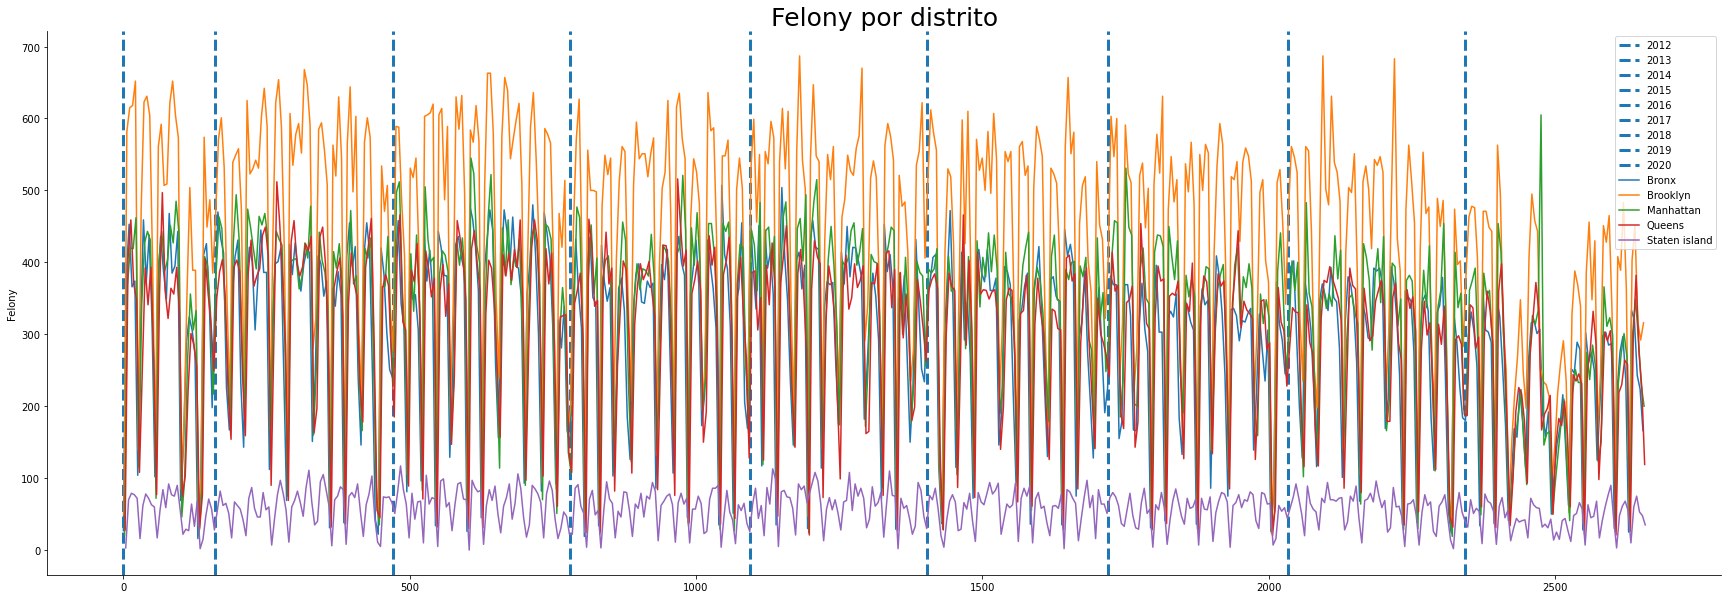

In [61]:
fig, ax = plt.subplots(1,1,figsize = (30,10))
sn.despine();
plt.title('Felony por distrito', size = 25)
for year, year_idx in years_initial_indexes.items():
    plt.axvline(year_idx, linewidth = 3, linestyle='--', label = f'{year}')
sn.lineplot(x= df_final.index, y = df_final['Felony'],data = df_final, hue = 'Borough')
plt.legend();

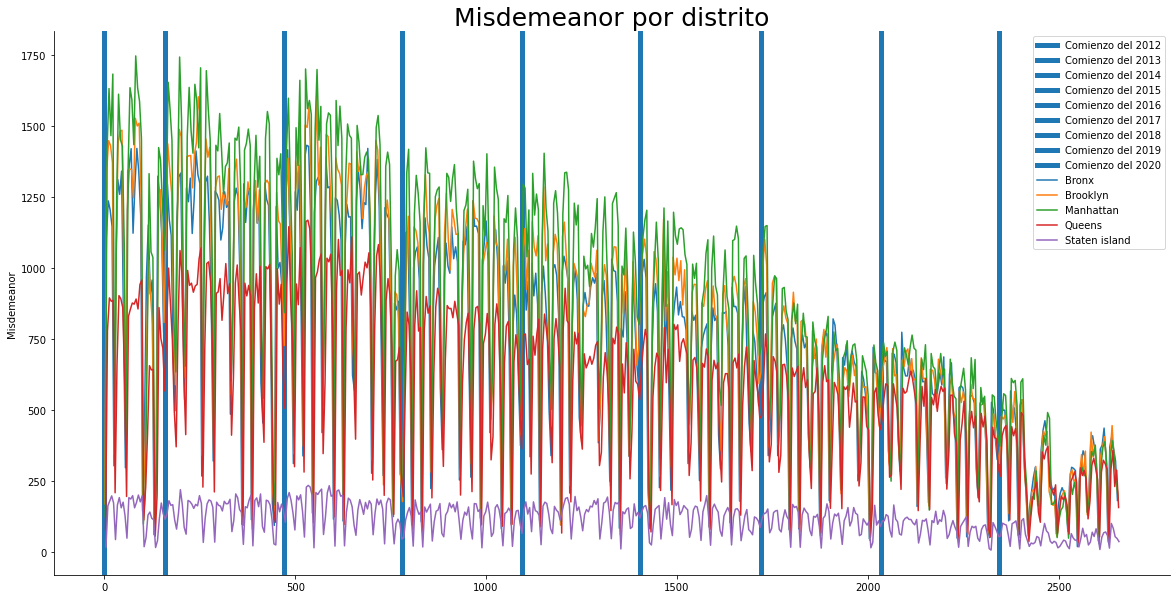

In [62]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
sn.despine();
plt.title('Misdemeanor por distrito', size = 25)
for year, year_idx in years_initial_indexes.items():
    plt.axvline(year_idx, label = f'Comienzo del {year}', linewidth = 5)
sn.lineplot(x= df_final.index, y = df_final['Misdemeanor'],data = df_final, hue = 'Borough')
plt.legend();

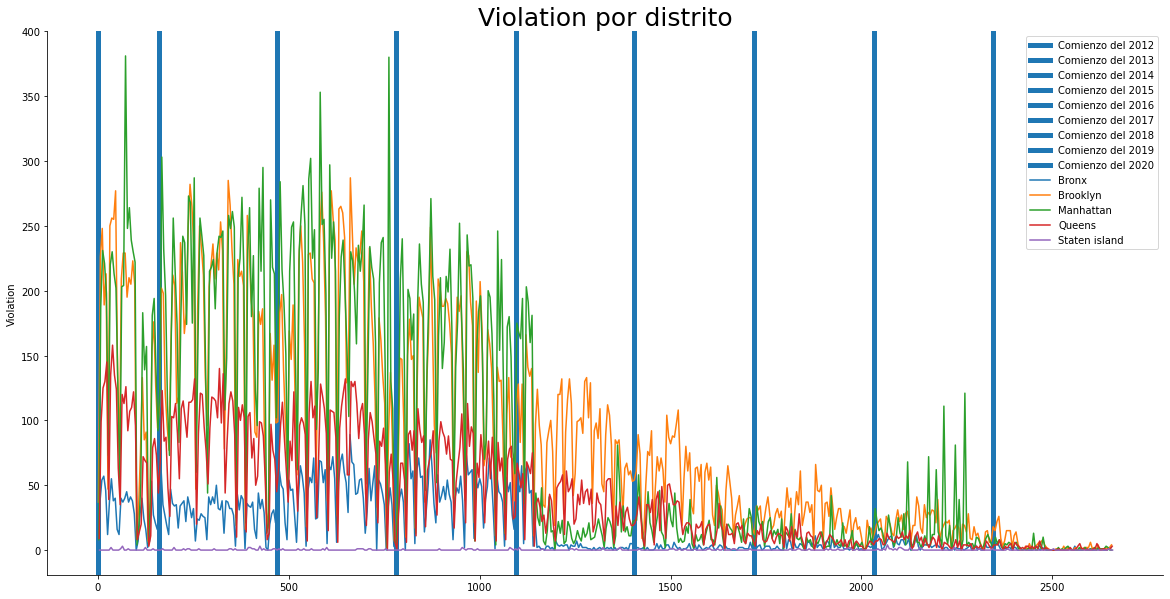

In [63]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
sn.despine();
plt.title('Violation por distrito', size = 25)
for year, year_idx in years_initial_indexes.items():
    plt.axvline(year_idx, label = f'Comienzo del {year}', linewidth = 5)
sn.lineplot(x= df_final.index, y = df_final['Violation'],data = df_final, hue = 'Borough')
plt.legend();

### Separación en Train y Test

Voy a dejar los dos ultimos años para pruebas y el resto para entrenamiento

In [64]:
df_bronx_train = df_bronx[df_bronx['year'] < 2019]
df_bronx_test = df_bronx[df_bronx['year'] >= 2019]

df_brooklyn_train = df_brooklyn[df_brooklyn['year'] < 2019]
df_brooklyn_test = df_brooklyn[df_brooklyn['year'] >= 2019]

df_manhattan_train = df_manhattan[df_manhattan['year'] < 2019]
df_manhattan_test = df_manhattan[df_manhattan['year'] >= 2019]

df_queens_train = df_queens[df_queens['year'] < 2019]
df_queens_test = df_queens[df_queens['year'] >= 2019]

df_statenIsland_train = df_statenIsland[df_statenIsland['year'] < 2019]
df_statenIsland_test = df_statenIsland[df_statenIsland['year'] >= 2019]

In [65]:
df_bronx.year.max()

2020

## Bronx

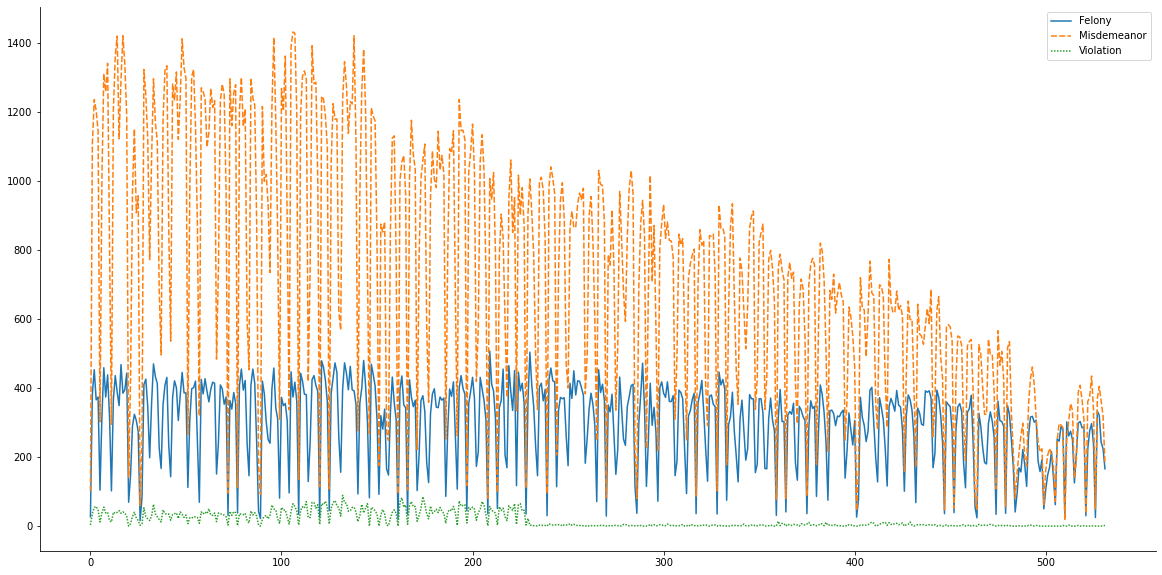

In [66]:
fig, ax = plt.subplots(1,1,figsize = (20,10))
sn.lineplot(data = df_bronx[['Felony', 'Misdemeanor', 'Violation']])
sn.despine();

### Felony

#### Train-Test Series

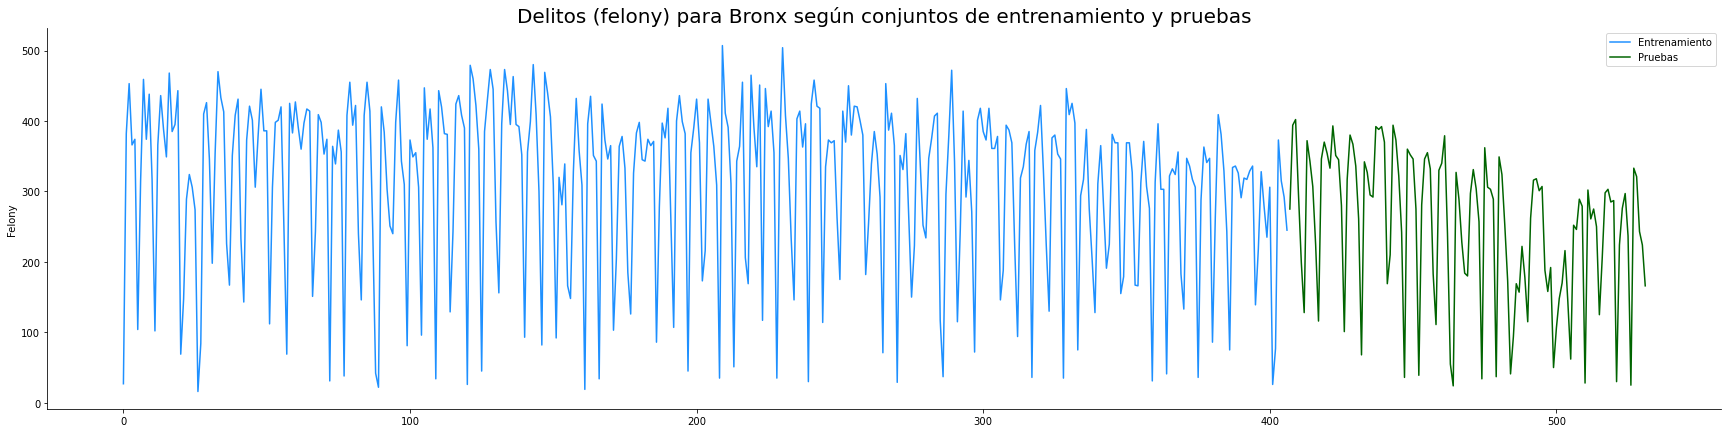

In [67]:
plt.subplots(figsize = (30,7))
sn.despine()
sn.lineplot(data = df_bronx_train.Felony, color = 'dodgerblue', label = 'Entrenamiento');
sn.lineplot(data = df_bronx_test.Felony, color = 'darkgreen', label = 'Pruebas')
plt.title('Delitos (felony) para Bronx según conjuntos de entrenamiento y pruebas', size = 20);

#### Autocorrelation Plots

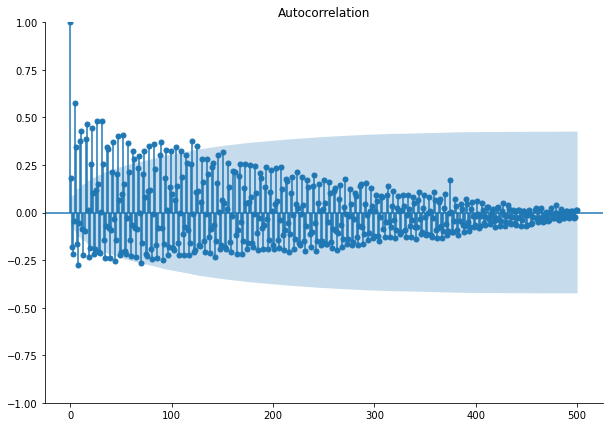

In [68]:
#plt.subplots(figsize = (30,7))
acf_bronx_felony, acf_bronx_felony_ic = acf(df_bronx.Felony, alpha = .05)
plot_acf(df_bronx.Felony, lags = 500)
sn.despine();

/home/ignacio/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


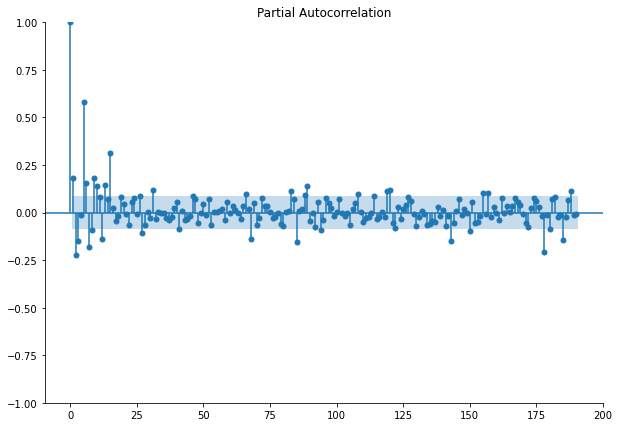

In [69]:
plot_pacf(df_bronx.Felony, lags = 190)
sn.despine()

/home/ignacio/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


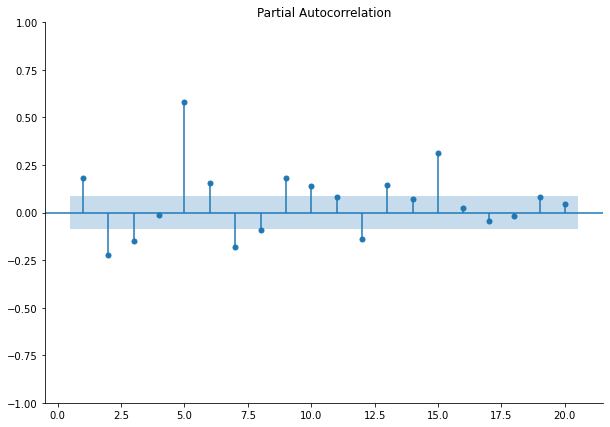

In [70]:
plot_pacf(df_bronx.Felony, lags = 20, zero = False)
sn.despine()

De acuerdo a los gráficos de ACF y PACF se puede ver que la función de autocorrelación decrece lentamente, mientras que la función de autocorrelación parcial es cortada abruptamente, esto sugiere una firma autorregresiva, es decir, el patrón de la serie puede ser mejor explicado mediante la adición de más términos autorregresivos ($x_{t-k}$) en lugar de términos de media móvil ($\phi_{k} \epsilon_{k}$).

__Un lag de 15 parece ser adecuado.__

A partir de lo anterior, evaluamos la descomposición de período:

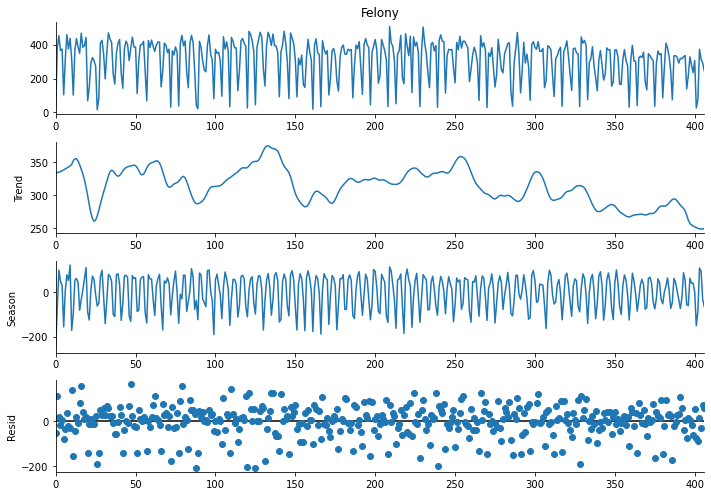

In [87]:
res = STL(df_bronx_train['Felony'], period = 10, seasonal = 7).fit()
res.plot()
sn.despine();

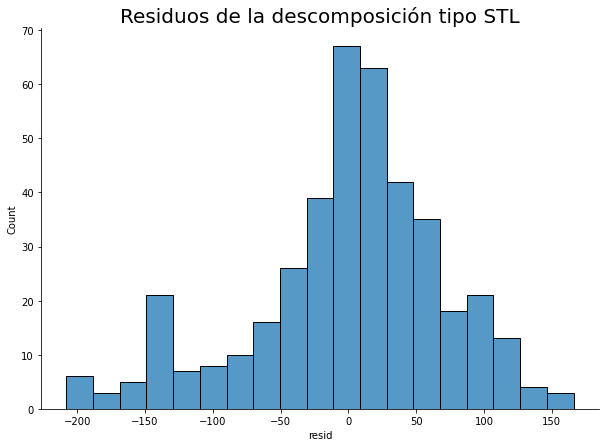

In [23]:
sn.histplot(res.resid)
plt.title('Residuos de la descomposición tipo STL', size = 20)
sn.despine()

Claramente parece haber una componente de tendencia distinta a constante, de todas formas voy a chequear con un test de AdFuller:

In [24]:
bronx_felony_stationarityTest = adfuller(df_bronx_train.Felony, autolag = 'AIC')
print(f'Estadístico de contraste ADF: {bronx_felony_stationarityTest[0]}')
print(f'P-value Adfuller: {bronx_felony_stationarityTest[1]}')
for key, value in bronx_felony_stationarityTest[4].items():
    print('\t%s: %.3f' % (key, value))

Estadístico de contraste ADF: -2.58969888353817
P-value Adfuller: 0.0951450439259181
	1%: -3.447
	5%: -2.869
	10%: -2.571


In [25]:
bronx_felony_stationary_unseasonal = df_bronx_train.Felony - res.trend

<AxesSubplot:>

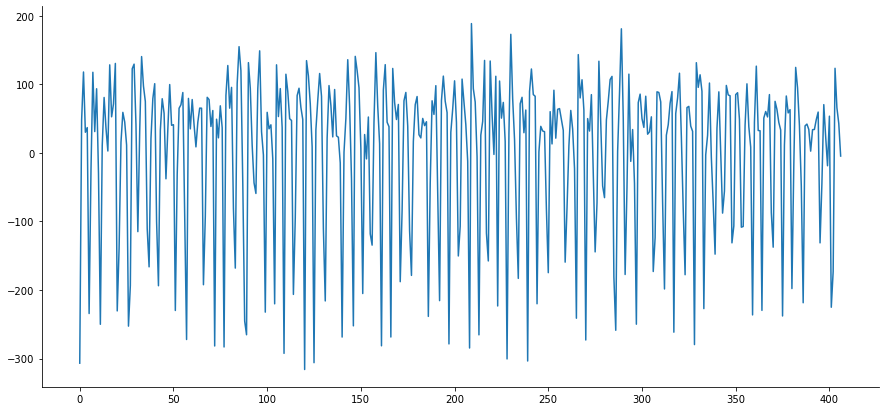

In [26]:
plt.subplots(figsize = (15,7))
sn.despine()
sn.lineplot(data = bronx_felony_stationary_unseasonal)

In [31]:
bronx_felony_stationarityTest = adfuller(bronx_felony_stationary_unseasonal.dropna(), autolag = 'AIC')
print(f'Estadístico de contraste ADF: {bronx_felony_stationarityTest[0]}')
print(f'P-value Adfuller: {bronx_felony_stationarityTest[1]}')
for key, value in bronx_felony_stationarityTest[4].items():
    print('\t%s: %.3f' % (key, value))

Estadístico de contraste ADF: -9.481498018861306
P-value Adfuller: 3.8618922948660953e-16
	1%: -3.447
	5%: -2.869
	10%: -2.571


#### Solo Autorregresivo

In [88]:
ar_order = np.zeros(shape = (15))

#ar_order[1] = 1
ar_order[4] = 1
ar_order[14] = 1
#ar_order[6] = 1
ma_order = np.zeros(shape = (15))

diff_order = 1

In [90]:
ma_order

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [169]:
arima_bronx_felony = ARIMA(bronx_felony_stationary_unseasonal,order = (ar_order, diff_order, ma_order))
arima_bronx_felony_results = arima_bronx_felony.fit()

In [170]:
arima_bronx_felony_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                 
================================================================================
Dep. Variable:                        y   No. Observations:                  407
Model:             ARIMA([5, 15], 1, 0)   Log Likelihood               -2567.851
Date:                  Wed, 22 Sep 2021   AIC                           5141.701
Time:                          01:19:53   BIC                           5153.720
Sample:                               0   HQIC                          5146.458
                                  - 407                                         
Covariance Type:                    opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L5          0.4917      0.038     12.903      0.000       0.417       0.566
ar.L15         0.1439      0.037      3.940      0.000       0.072       0.215
sigma2      1.815e+04   1118.930     16.225      0.000     1.6e+04    2.03e+04
===================================================================================
Ljung-Box (L1) (Q):                  73.82   Jarque-Bera (JB):                13.68
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.32
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [171]:
import warnings
warnings.filterwarnings('ignore')

In [207]:
%%time
test_size = df_bronx_test.shape[0]
series = df_bronx['Felony']
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    res = STL(train, period = 15).fit()
    train_deseasonaled = train - res.seasonal
    model = ARIMA(train_deseasonaled,order = (ar_order, diff_order, ma_order))
    model_fit = model.fit(method = 'statespace')
    pred = model_fit.forecast(steps=1)# + res.seasonal[-1:].values
    rolling_predictions.append(pred.values[0])#.append(np.sqrt(pred.variance.values[-1,:][0]))

CPU times: user 16.7 s, sys: 2.89 ms, total: 16.7 s
Wall time: 16.7 s


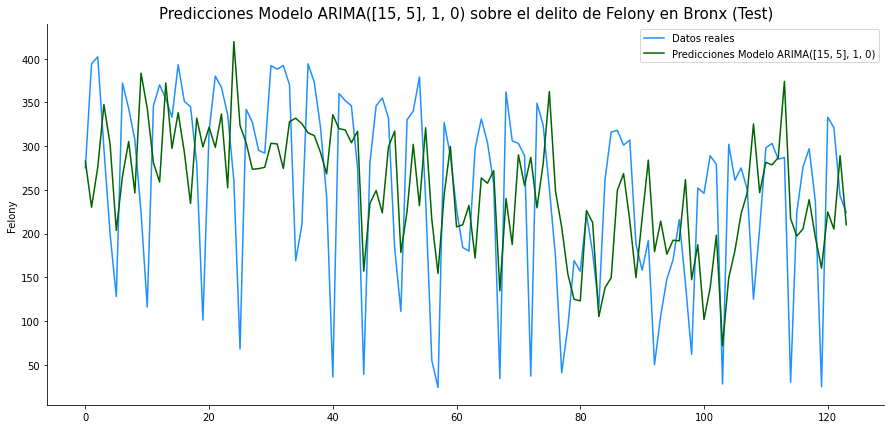

In [214]:
plt.subplots(figsize = (15,7))
plt.title('Predicciones Modelo ARIMA([15, 5], 1, 0) sobre el delito de Felony en Bronx (Test)', size = 15)
sn.lineplot(data = df_bronx_test['Felony'].reset_index(drop=True)[:-1], label = 'Datos reales', color = 'dodgerblue')
sn.lineplot(data = rolling_predictions[1:], color = 'darkgreen', label = 'Predicciones Modelo ARIMA([15, 5], 1, 0)')
sn.despine();


In [209]:
mean_absolute_error(df_bronx_test['Felony'][:-1], rolling_predictions[1:])

80.99012945485917

In [210]:
residuos_arima_15_1_0 = df_bronx_test['Felony'].reset_index(drop=True)[:-1]- rolling_predictions[1:]

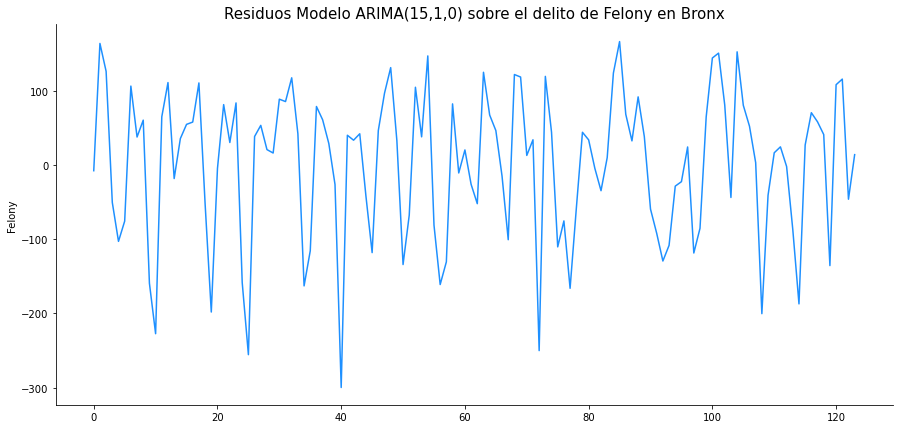

In [211]:
plt.subplots(figsize = (15,7))
plt.title('Residuos Modelo ARIMA(15,1,0) sobre el delito de Felony en Bronx', size = 15)
sn.lineplot(data = residuos_arima_15_1_0, color = 'dodgerblue')
sn.despine();

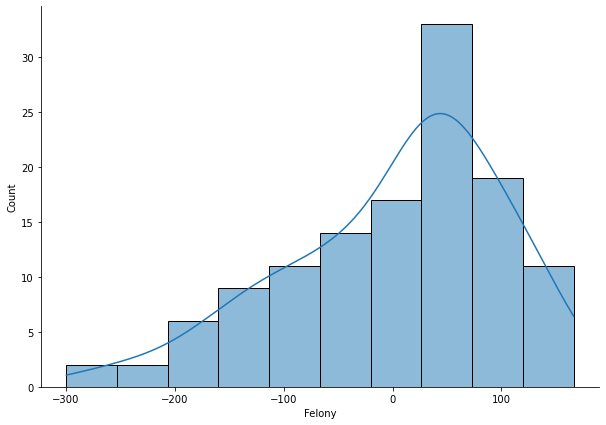

In [212]:
sn.histplot(data = residuos_arima_15_1_0, kde=True)
sn.despine()

In [178]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(residuos_arima_15_1_0)
list(zip(name, test))

[('Jarque-Bera', 10.62875728642817),
 ('Chi^2 two-tail prob.', 0.004920335089308612),
 ('Skew', -0.7171251113707929),
 ('Kurtosis', 3.0102532042294)]

Sobre entrenamiento

In [217]:
train_size = df_bronx_train.shape[0]
series = df_bronx['Felony']
rolling_predictions = []
for i in range(train_size):
    train = series[:-(train_size-i)]
    res = STL(train, period = 15).fit()
    train_deseasonaled = train - res.seasonal
    model = ARIMA(train_deseasonaled,order = (ar_order, diff_order, ma_order))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=1) + res.seasonal[-1:].values
    rolling_predictions.append(pred.values[0])#.append(np.sqrt(pred.variance.values[-1,:][0]))

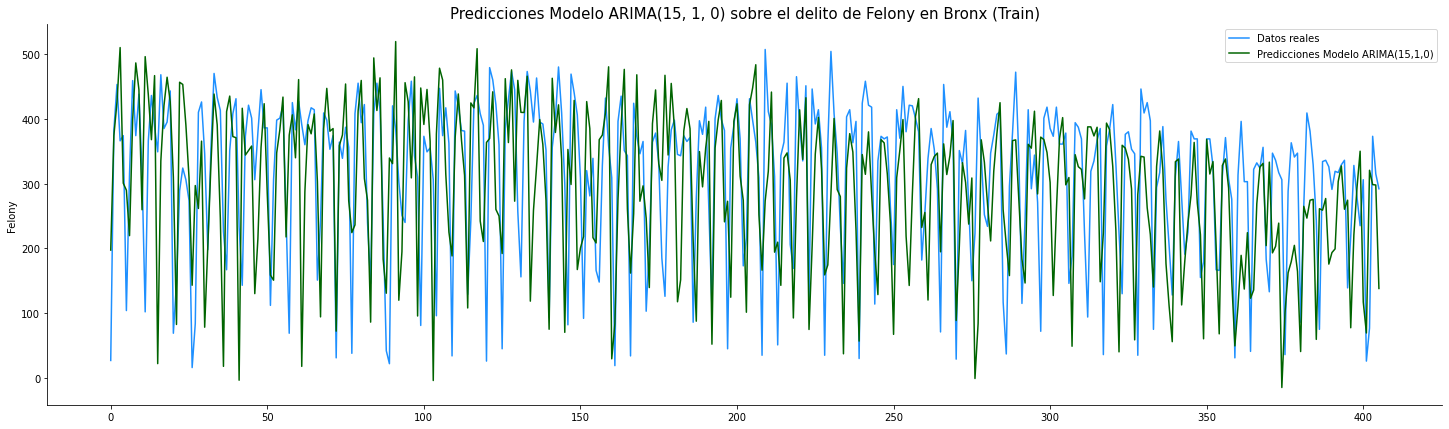

In [218]:
plt.subplots(figsize = (25,7))
plt.title('Predicciones Modelo ARIMA(15, 1, 0) sobre el delito de Felony en Bronx (Train)', size = 15)
sn.lineplot(data = df_bronx_train['Felony'].reset_index(drop=True)[:-1], label = 'Datos reales', color = 'dodgerblue')
sn.lineplot(data = rolling_predictions[1:], color = 'darkgreen', label = 'Predicciones Modelo ARIMA(15,1,0)')
sn.despine();


In [219]:
mean_absolute_error(df_bronx_train['Felony'][:-1], rolling_predictions[1:])

99.65937197993502

In [220]:
residuos_arima_15_1_0 = df_bronx_train['Felony'].reset_index(drop=True)[:-1]- rolling_predictions[1:]

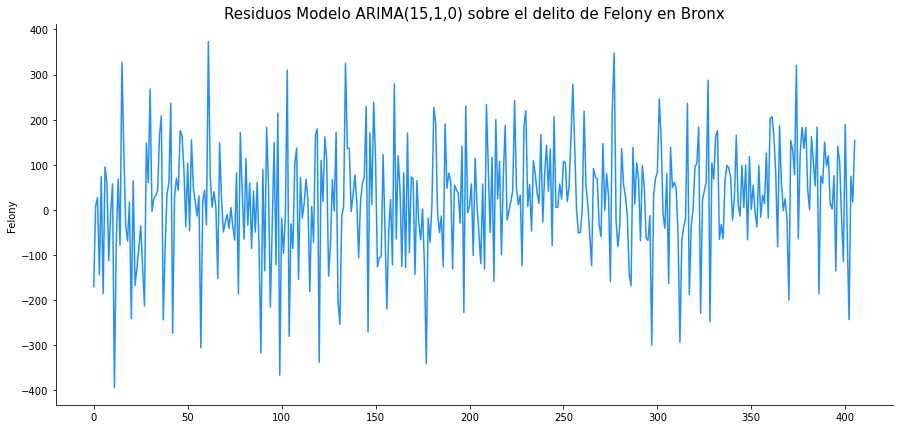

In [221]:
plt.subplots(figsize = (15,7))
plt.title('Residuos Modelo ARIMA(15,1,0) sobre el delito de Felony en Bronx', size = 15)
sn.lineplot(data = residuos_arima_15_1_0, color = 'dodgerblue')
sn.despine();

In [184]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(residuos_arima_15_1_0)
list(zip(name, test))

[('Jarque-Bera', 12.842775437273687),
 ('Chi^2 two-tail prob.', 0.0016263976856560676),
 ('Skew', -0.34761144975776387),
 ('Kurtosis', 3.525208495334856)]

#### Incorporando componente MA

A partir de los gráficos de autocorrelación, de existir una componente MA debiese esta ser de orden 5 y/o 15

In [27]:
ar_order = np.zeros(shape = (15))
#ar_order[1] = 1
ar_order[4] = 1
ar_order[14] = 1

ma_order = np.zeros(shape = (15))
ma_order[4] = 1
#ma_order[14] = 1


diff_order = 1

In [28]:
arima_bronx_felony = ARIMA(bronx_felony_stationary_unseasonal.dropna(),order = (ar_order, diff_order, ma_order))
arima_bronx_felony_results = arima_bronx_felony.fit()

In [29]:
arima_bronx_felony_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  407
Model:             ARIMA([5, 15], 1, [5])   Log Likelihood               -2562.628
Date:                    Thu, 23 Sep 2021   AIC                           5133.256
Time:                            02:04:41   BIC                           5149.282
Sample:                                 0   HQIC                          5139.599
                                    - 407                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L5          0.2761      0.070      3.955      0.000       0.139       0.413
ar.L15         0.1992      0.041      4.840      0.000       0.119       0.280
ma.L5          0.2997      0.072      4.163      0.000       0.159       0.441
sigma2      1.768e+04   1186.074     14.905      0.000    1.54e+04       2e+04
===================================================================================
Ljung-Box (L1) (Q):                  65.67   Jarque-Bera (JB):                 4.54
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.77   Skew:                            -0.20
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
%%time
test_size = df_bronx_test.shape[0]
series = df_bronx['Felony']
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    res = STL(train, period = 15).fit()
    train_deseasonaled = train - res.seasonal
    model = ARIMA(train_deseasonaled,order = (ar_order, diff_order, ma_order))
    model_fit = model.fit(method='statespace')
    pred = model_fit.forecast(steps=1) + res.seasonal[-1:].values
    rolling_predictions.append(pred.values[0])#.append(np.sqrt(pred.variance.values[-1,:][0]))

CPU times: user 22.4 s, sys: 0 ns, total: 22.4 s
Wall time: 22.4 s


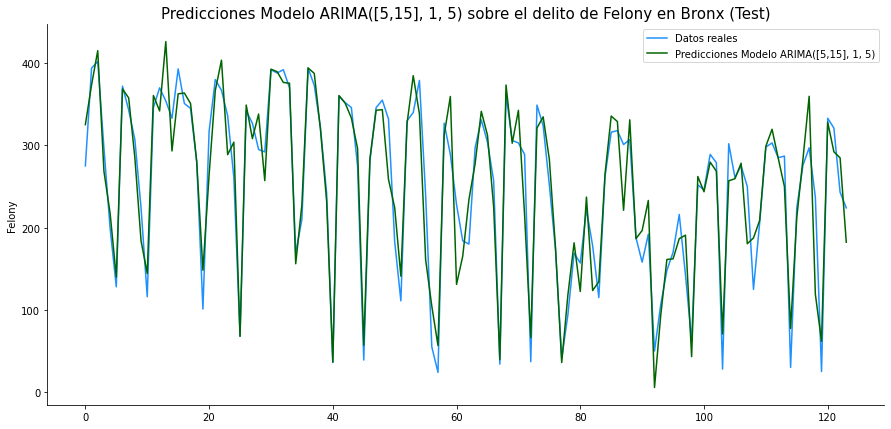

In [31]:
plt.subplots(figsize = (15,7))
plt.title('Predicciones Modelo ARIMA([5,15], 1, 5) sobre el delito de Felony en Bronx (Test)', size = 15)
sn.lineplot(data = df_bronx_test['Felony'].reset_index(drop=True)[:-1], label = 'Datos reales', color = 'dodgerblue')
sn.lineplot(data = rolling_predictions[1:], color = 'darkgreen', label = 'Predicciones Modelo ARIMA([5,15], 1, 5)')
sn.despine();


In [32]:
mean_absolute_error(df_bronx_test['Felony'][:-1], rolling_predictions[1:])

25.643216534084623

In [33]:
residuos_arima_5_15_1_5 = df_bronx_test['Felony'].reset_index(drop=True)[:-1]- rolling_predictions[1:]

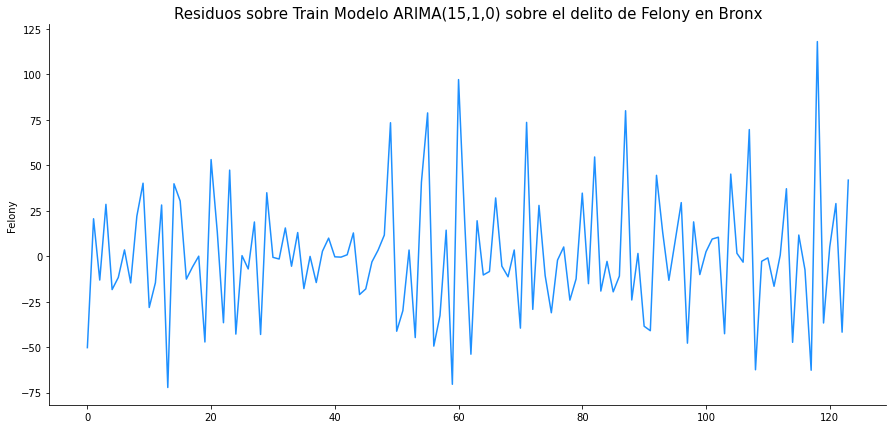

In [35]:
plt.subplots(figsize = (15,7))
plt.title('Residuos sobre Train Modelo ARIMA(15,1,0) sobre el delito de Felony en Bronx', size = 15)
sn.lineplot(data = residuos_arima_5_15_1_5, color = 'dodgerblue')
sn.despine();

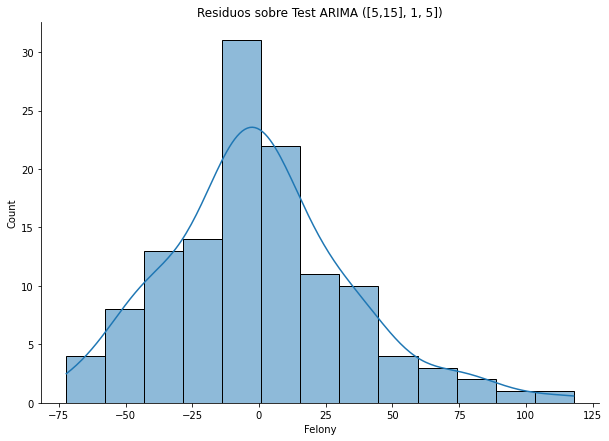

In [37]:
sn.histplot(data = residuos_arima_5_15_1_5, kde=True)
plt.title('Residuos sobre Test ARIMA ([5,15], 1, 5])')
sn.despine()

In [39]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(residuos_arima_5_15_1_5)
list(zip(name, test))

[('Jarque-Bera', 9.990247043680613),
 ('Chi^2 two-tail prob.', 0.006770884695173866),
 ('Skew', 0.5778318305514202),
 ('Kurtosis', 3.7733289755395685)]

In [162]:
%%time
train_size = df_bronx_train.shape[0]
series = df_bronx['Felony']
rolling_predictions = []
for i in range(train_size):
    train = series[:-(train_size-i)]
    res = STL(train, period = 15).fit()
    train_deseasonaled = train - res.seasonal
    model = ARIMA(train_deseasonaled,order = (ar_order, diff_order, ma_order))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=1) + res.seasonal[-1:].values
    rolling_predictions.append(pred.values[0])#.append(np.sqrt(pred.variance.values[-1,:][0]))

CPU times: user 1min 20s, sys: 0 ns, total: 1min 20s
Wall time: 1min 20s


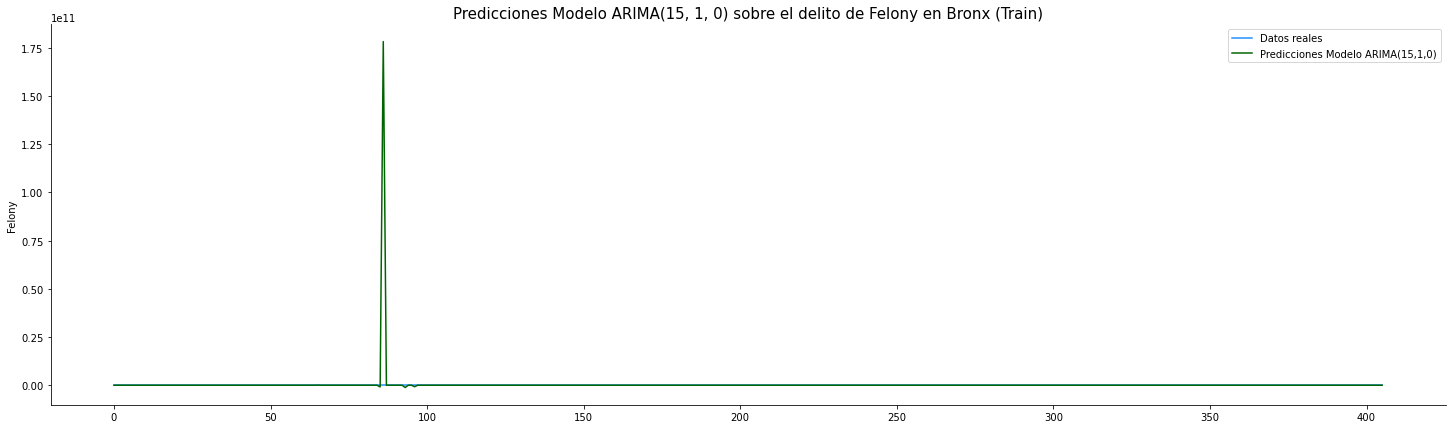

In [163]:
plt.subplots(figsize = (25,7))
plt.title('Predicciones Modelo ARIMA([5, 15], 1, 5) sobre el delito de Felony en Bronx (Train)', size = 15)
sn.lineplot(data = df_bronx_train['Felony'].reset_index(drop=True)[:-1], label = 'Datos reales', color = 'dodgerblue')
sn.lineplot(data = rolling_predictions[1:], color = 'darkgreen', label = 'Predicciones Modelo ARIMA(15,1,0)')
sn.despine();


In [131]:
mean_absolute_error(df_bronx_train['Felony'][:-1], rolling_predictions[1:])

3.13272794313978e+23

In [164]:
residuos_arima_15_1_0 = df_bronx_train['Felony'].reset_index(drop=True)[:-1]- rolling_predictions[1:]

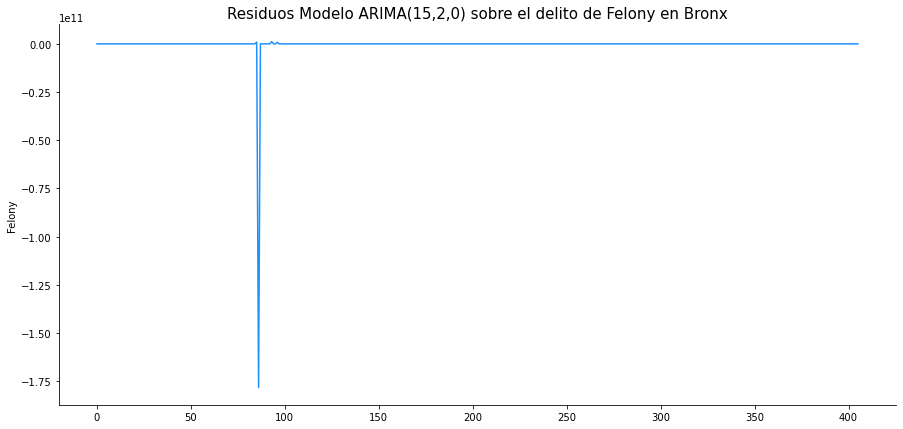

In [165]:
plt.subplots(figsize = (15,7))
plt.title('Residuos Modelo ARIMA(15,2,0) sobre el delito de Felony en Bronx', size = 15)
sn.lineplot(data = residuos_arima_15_1_0, color = 'dodgerblue')
sn.despine();

In [166]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(residuos_arima_15_1_0)
list(zip(name, test))

[('Jarque-Bera', 2746541.5409417725),
 ('Chi^2 two-tail prob.', 0.0),
 ('Skew', -20.07222936497188),
 ('Kurtosis', 403.9308641878413)]

#### Incorporando información exógena

In [167]:
ar_order = np.zeros(shape = (15))
#ar_order[1] = 1
ar_order[4] = 1
ar_order[14] = 1

ma_order = np.zeros(shape = (15))
ma_order[4] = 1
#ma_order[14] = 1


diff_order = 1

In [168]:
sarimax_bronx_felony = SARIMAX(bronx_felony_stationary_unseasonal.dropna(), exog = df_bronx_train.Misdemeanor,
                             order = (ar_order, diff_order, ma_order))
sarimax_bronx_felony_results = sarimax_bronx_felony.fit()

In [169]:
arima_bronx_felony_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                  407
Model:             ARIMA([5, 15], 1, [5])   Log Likelihood               -2562.628
Date:                    Tue, 21 Sep 2021   AIC                           5133.256
Time:                            02:20:08   BIC                           5149.282
Sample:                                 0   HQIC                          5139.599
                                    - 407                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L5          0.2761      0.070      3.955      0.000       0.139       0.413
ar.L15         0.1992      0.041      4.840      0.000       0.119       0.280
ma.L5          0.2997      0.072      4.163      0.000       0.159       0.441
sigma2      1.768e+04   1186.074     14.905      0.000    1.54e+04       2e+04
===================================================================================
Ljung-Box (L1) (Q):                  65.67   Jarque-Bera (JB):                 4.54
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               0.77   Skew:                            -0.20
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [226]:
exog_series

0       102
1      1105
2      1236
3      1204
4      1146
       ... 
527     369
528     405
529     361
530     319
531     180
Name: Misdemeanor, Length: 532, dtype: int64

In [230]:
%%time
test_size = df_bronx_test.shape[0]
series = df_bronx['Felony']
exog_series = df_bronx['Misdemeanor']
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    train_exog = exog_series[:-(test_size-i)]
#    test_exog = exog_series[-test_size-i-1]
    res = STL(train, period = 15).fit()
    train_deseasonaled = train - res.seasonal
    model = SARIMAX(train_deseasonaled, exog = train_exog,
                             order = (ar_order, diff_order, ma_order))
    model_fit = model.fit()
    print(train.shape[0]+i-3)
    print(train.shape[0]+i-2)
    print()
    pred = model_fit.forecast(exog = exog_series[train.shape[0]+i:train.shape[0]+i-2][-1], steps=1) + res.seasonal[-1:].values
    rolling_predictions.append(pred.values[0])#.append(np.sqrt(pred.variance.values[-1,:][0]))

404
405

406
407

408
409

410
411

412
413

414
415

416
417

418
419

420
421

422
423

424
425

426
427

428
429

430
431

432
433

434
435

436
437

438
439

440
441

442
443

444
445

446
447

448
449

450
451

452
453

454
455

456
457

458
459

460
461

462
463

464
465

466
467

468
469

470
471

472
473

474
475

476
477

478
479

480
481

482
483

484
485

486
487

488
489

490
491

492
493

494
495

496
497

498
499

500
501

502
503

504
505

506
507

508
509

510
511

512
513

514
515

516
517

518
519

520
521

522
523

524
525

526
527

528
529

530
531

532
533



ValueError: Provided exogenous values are not of the appropriate shape. Required (1, 1), got (0,).

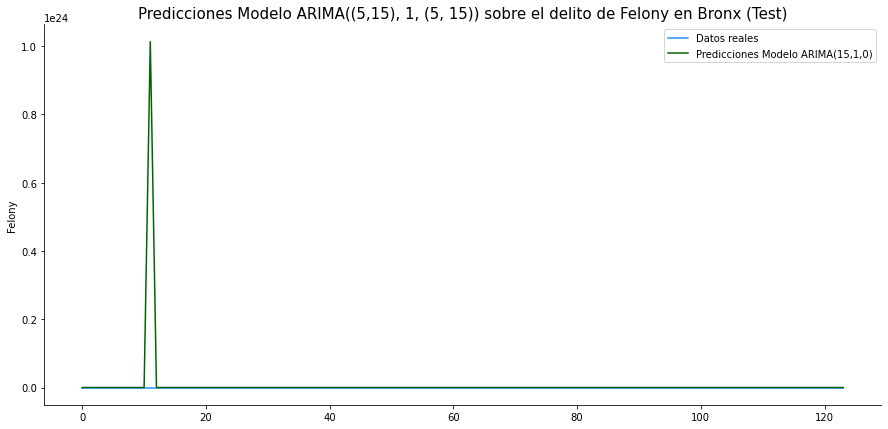

In [196]:
plt.subplots(figsize = (15,7))
plt.title('Predicciones Modelo SARIMAX((5,15), 1, (5, 15)) sobre el delito de Felony en Bronx (Test)', size = 15)
sn.lineplot(data = df_bronx_test['Felony'].reset_index(drop=True)[:-1], label = 'Datos reales', color = 'dodgerblue')
sn.lineplot(data = rolling_predictions[1:], color = 'darkgreen', label = 'Predicciones Modelo ARIMA(15,1,0)')
sn.despine();


##### Aproximación mediante Redes Neuronales para TS

In [9]:
#drop_cols_train = ['year', 'month', 'week', 'Borough', 'Felony', 'Misdemeanor', 'Violation', 'Housing', '']
keep_cols = ['Patrol', 'Transit', '18-24', '25-44', '45-64', '65+', '<18', 'Female', 'Male', 'American indian/alaskan native', 'Asian / pacific islander', 'Black', 'Black hispanic', 'Other', 'White',
            'White hispanic', 'Animal abuse', 'Domestic', 'Drug_&_Violence', 'Noise', 'Traffic_related', 'Number_of_persons_injured', 'Number_of_persons_killed', 'Backing unsafely',
             'Driver inattention/distraction', 'Driver inexperience', 'Failure to yield right-of-way', 'Fatigued/drowsy', 'Following too closely', 'Lost consciousness', 'Other vehicular',
             'Passing or lane usage improper', 'Passing too closely', 'Prescription medication', 'Traffic control disregarded', 'Turning improperly', 'Unsafe lane changing', 'Unspecified']

In [10]:
def create_dataset(dataset, lag = 1):
    train, target = [], []
    #dataset = pd.DataFrame(data)
    for index, row in dataset.iterrows():
        train.append(dataset.iloc[index:index+lag].values)
        target.append(dataset.iloc[index+lag].values)
        if(index+lag+1 == dataset.shape[0]):
            break;
    return np.array(train), np.expand_dims(np.array(target), axis = 2)


def buildLaggedFeatures(s,lag=2,dropna=True):
    '''
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for col_name in s:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)
    
    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [11]:
LAG = 5

In [12]:
X_train_bronx = buildLaggedFeatures(df_bronx_train['Felony'], lag = LAG, dropna = True).iloc[:-1,:]
X_test_bronx = buildLaggedFeatures(df_bronx_test['Felony'], lag = LAG, dropna = True).iloc[:-1,:]
y_train_bronx = df_bronx_train.Felony.iloc[LAG+1:]
y_test_bronx = df_bronx_test.Felony.iloc[LAG+1:]

In [13]:
y_train_bronx

6      315
7      459
8      374
9      438
10     317
      ... 
402     77
403    373
404    315
405    292
406    245
Name: Felony, Length: 401, dtype: int64

In [14]:
X_train_bronx

lag_0  lag_1  lag_2  lag_3  lag_4  lag_5
5      104  374.0  366.0  453.0  382.0   27.0
6      315  104.0  374.0  366.0  453.0  382.0
7      459  315.0  104.0  374.0  366.0  453.0
8      374  459.0  315.0  104.0  374.0  366.0
9      438  374.0  459.0  315.0  104.0  374.0
..     ...    ...    ...    ...    ...    ...
401     26  306.0  235.0  279.0  328.0  218.0
402     77   26.0  306.0  235.0  279.0  328.0
403    373   77.0   26.0  306.0  235.0  279.0
404    315  373.0   77.0   26.0  306.0  235.0
405    292  315.0  373.0   77.0   26.0  306.0

[401 rows x 6 columns]

##### Keras

In [15]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta
from keras import backend as K
from keras.utils import to_categorical
from keras.callbacks import LearningRateScheduler, History

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, LSTM, SimpleRNN, GRU
from sklearn.preprocessing import MinMaxScaler


In [16]:
bronx_train = np.expand_dims(df_bronx_train[df_bronx_train['year'] < 2018]['Felony'].values, axis=1)
bronx_val = np.expand_dims(df_bronx_train[df_bronx_train['year'] == 2018]['Felony'].values, axis = 1)

In [17]:
# Scaling & subsampling
#df_train, df_test = dataframe[:1500].values, dataframe[1500:].values
scaler = MinMaxScaler(feature_range=(0,1)).fit(bronx_train)
stream_train_scaled = scaler.transform(bronx_train)
stream_test_scaled = scaler.transform(np.expand_dims(df_bronx_test['Felony'], axis = 1))
stream_val_scaled = scaler.transform(bronx_val)

In [18]:
lag = 15
trainX, trainY = create_dataset(pd.DataFrame(stream_train_scaled), lag)
testX, testY = create_dataset(pd.DataFrame(stream_test_scaled), lag)
valX,valY = create_dataset(pd.DataFrame(stream_val_scaled), lag)

In [19]:
trainX.shape

(329, 15, 1)

In [20]:
trainX, trainY = create_dataset(pd.DataFrame(stream_train_scaled), lag)
testX, testY = create_dataset(pd.DataFrame(stream_test_scaled), lag)
valX,valY = create_dataset(pd.DataFrame(stream_val_scaled), lag)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
trainY = np.reshape(trainY, (trainY.shape[0], 1, trainY.shape[1]))

testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
testY = np.reshape(testY, (testY.shape[0], 1, testY.shape[1]))

valX = np.reshape(valX, (valX.shape[0], 1, valX.shape[1]))
valY = np.reshape(valY, (valY.shape[0], 1, valY.shape[1]))

In [21]:
batch = 32
history = History()

model_lstm = Sequential()

model_lstm.add(
    LSTM(100, input_shape = (1, lag),
        activation = 'tanh',
        recurrent_activation = 'sigmoid',
        return_sequences = True))

model_lstm.add(Dense(1,activation = 'linear'))
optimizer = Adam()
model_lstm.compile(loss = 'mean_squared_error', optimizer = optimizer, metrics = ['mean_absolute_error'])

In [22]:
%%time
model_lstm.fit(trainX, trainY, epochs=500, batch_size=batch, verbose=0, callbacks = [history], validation_data=(valX, valY));


CPU times: user 6min 23s, sys: 5min 22s, total: 11min 46s
Wall time: 1min 5s


In [25]:
hist_lstm = history.history['loss']
validation_hist_lstm = history.history['val_loss']

In [26]:
len(hist_lstm)

500

Final loss: 0.022
Total loss change: 0.3276


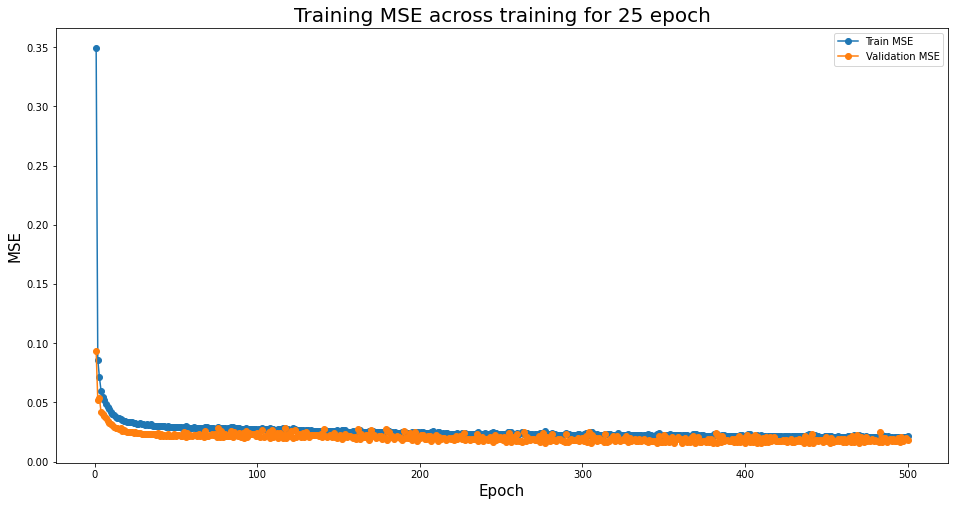

In [27]:
print('Final loss: {0}'.format(round(hist_lstm[-1],4)))
print('Total loss change: {0}'.format(round(hist_lstm[0]-hist_lstm[-1], 4)))
fig,_ = plt.subplots(figsize = (16,8))
plt.title('Training MSE across training for 25 epoch', size = 20)
plt.xlabel('Epoch', size = 15)
plt.ylabel('MSE', size = 15)
plt.plot(range(1,501), hist_lstm, '-o', label = 'Train MSE');
plt.plot(range(1,501), validation_hist_lstm, '-o', label = 'Validation MSE');
plt.legend()

In [28]:
trainPredict = model_lstm.predict(trainX, batch_size= batch)
trainPredict = scaler.inverse_transform(trainPredict[:,:,0])
trainY = scaler.inverse_transform(trainY.reshape(trainY.shape[0], trainY.shape[1]))

testPredict = model_lstm.predict(testX, batch_size=batch)
testPredict = scaler.inverse_transform(testPredict[:,:,0])
testY = scaler.inverse_transform(testY.reshape(testY.shape[0], testY.shape[1]))

In [29]:
import math
train_score = np.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
test_score = np.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('train score: %.2f RMSE' %train_score)
print('test score: %.2f RMSE' %test_score)

train score: 69.79 RMSE
test score: 76.86 RMSE


In [30]:
train_score = mean_absolute_error(trainY[:,0], trainPredict[:,0])
test_score = mean_absolute_error(testY[:,0], testPredict[:,0])
print('train score: %.2f MAE' %train_score)
print('test score: %.2f MAE' %test_score)

train score: 49.43 MAE
test score: 57.36 MAE


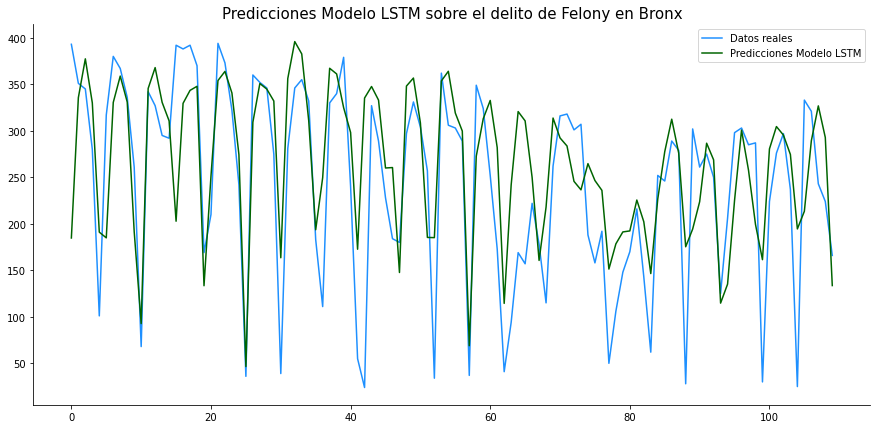

In [51]:
plt.subplots(figsize = (15,7))
plt.title('Predicciones Modelo LSTM sobre el delito de Felony en Bronx', size = 15)
sn.lineplot(data = [x[0] for x in testY], label = 'Datos reales', color = 'dodgerblue')
sn.lineplot(data = [x[0] for x in testPredict], color = 'darkgreen', label = 'Predicciones Modelo LSTM')
sn.despine();

Analisis de los residuos

In [64]:
train_y = np.array([x[0] for x in trainY])
lstm_train_predict = np.array([x[0] for x in trainPredict])

residuos_lstm = train_y-lstm_train_predict

In [65]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
test = sms.jarque_bera(residuos_lstm)
list(zip(name, test))

[('Jarque-Bera', 94.7813138391369),
 ('Chi^2 two-tail prob.', 2.62119424679552e-21),
 ('Skew', 0.12462104008313768),
 ('Kurtosis', 5.617635723517412)]

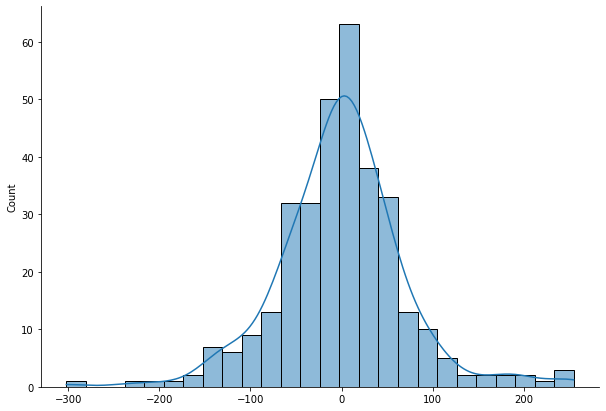

In [70]:
sn.histplot(residuos_lstm, kde = True)
sn.despine()

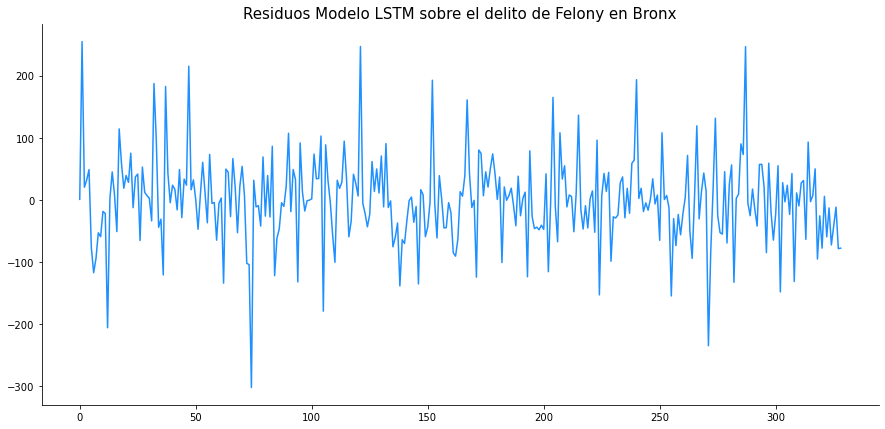

In [67]:
plt.subplots(figsize = (15,7))
plt.title('Residuos Modelo LSTM sobre el delito de Felony en Bronx', size = 15)
sn.lineplot(data = residuos_lstm, color = 'dodgerblue')
sn.despine();

In [84]:
# shift train
trainPredictPlot = np.empty_like(df_bronx_train['Felony'].values)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(trainPredict)+lag, :] = trainPredict

#shift test
testPredictPlot = np.empty_like(df_bronx_test['Felony'].values)
testPredictPlot[:, :] = np.nan
testPredictPlot[(len(trainPredict)+3*lag+len(valX)):, :] = testPredict


IndexError: too many indices for array

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (16,8))

fig.suptitle('Predicciones de la serie', size = 20)
sn.lineplot(data = df_temperaturas.Temp, ax = ax)
sn.lineplot(data = pd.DataFrame(trainPredictPlot, columns = ['Temp'])['Temp'], color = 'indianred', ax = ax)
sn.lineplot(data = pd.DataFrame(testPredictPlot, columns = ['Temp'])['Temp'], color = 'darkgreen', ax = ax);

In [50]:
# Conjunto de entrenamiento
trainPredict_1 = model_1.predict(trainX, batch_size = batch_1)
trainPredict_1 = scaler.inverse_transform(trainPredict_1[:,:,0])
trainY_1 = scaler.inverse_transform(trainY[:,:,0])

# Conjunto de entrenamiento
valPredict_1 = model_1.predict(valX, batch_size = batch_1)
valPredict_1 = scaler.inverse_transform(valPredict_1[:,:,0])
valY_1 = scaler.inverse_transform(valY[:,:,0])


# Conjunto de pruebas
testPredict_1 = model_1.predict(testX, batch_size = batch_1)
testPredict_1 = scaler.inverse_transform(testPredict_1[:,:,0])
testY_1 = scaler.inverse_transform(testY[:,:,0])

In [44]:
trainPredictPlot.shape

(532,)

In [52]:
# shift train predictions for plotting
trainPredictPlot = np.expand_dims(np.empty_like(df_bronx['Felony']), axis = 1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lag:len(trainPredict_1)+lag, :] = trainPredict_1

#shift test predictions for plotting
valPredictPlot = np.expand_dims(np.empty_like(df_bronx['Felony'].values), axis = 1)
#valPredictPlot[:] = np.nan
valPredictPlot[(len(trainPredict_1)+2*lag):(len(valPredict_1)+2*lag), :] = valPredict_1

#shift test predictions for plotting
testPredictPlot = np.empty_like(df_bronx['Felony'].values)
testPredictPlot[:,:] = np.nan
testPredictPlot[(len(valPredict_1)+2*lag):, :] = testPredict_1

ValueError: could not broadcast input array from shape (48,1) into shape (0,1)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (16,8))

fig.suptitle('Predicciones de la serie', size = 20)
sn.tsplot(dataframe['Temp'], ax= ax)
sn.tsplot(pd.DataFrame(trainPredictPlot, columns=['Temp'])['Temp'], color='indianred', ax= ax)
sn.tsplot(pd.DataFrame(testPredictPlot, columns=['Temp'])['Temp'], color='darkgreen', ax= ax);

##### Torch

In [75]:
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
from torch import autograd
import datetime

batch_size = 64

train_features = torch.Tensor(np.array(X_train_bronx))
train_targets = torch.Tensor(np.array(y_train_bronx))
#val_features = torch.Tensor(X_val_)
#val_targets = torch.Tensor(y_val_arr)
test_features = torch.Tensor(np.array(X_test_bronx))
test_targets = torch.Tensor(np.array(y_test_bronx))

train = TensorDataset(train_features, train_targets)
#val = TensorDataset(val_features, val_targets)
test = TensorDataset(test_features, test_targets)

train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
#val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)

In [76]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, device):
        super(GRUModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.layer_dim = layer_dim
        self.hidden_dim = hidden_dim
        self.device = device

        # GRU layers
        self.gru = nn.GRU(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_()
        h0 = h0.cuda()

        # Forward propagation by passing in the input and hidden state into the model
        out, h1 = self.gru(x, h0)

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[:, -1, :]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out
class LSTMModel(nn.Module):
    """LSTMModel class extends nn.Module class and works as a constructor for LSTMs.

       LSTMModel class initiates a LSTM module based on PyTorch's nn.Module class.
       It has only two methods, namely init() and forward(). While the init()
       method initiates the model with the given input parameters, the forward()
       method defines how the forward propagation needs to be calculated.
       Since PyTorch automatically defines back propagation, there is no need
       to define back propagation method.

       Attributes:
           hidden_dim (int): The number of nodes in each layer
           layer_dim (str): The number of layers in the network
           lstm (nn.LSTM): The LSTM model constructed with the input parameters.
           fc (nn.Linear): The fully connected layer to convert the final state
                           of LSTMs to our desired output shape.

    """
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim, dropout_prob, device):
        """The __init__ method that initiates a LSTM instance.

        Args:
            input_dim (int): The number of nodes in the input layer
            hidden_dim (int): The number of nodes in each layer
            layer_dim (int): The number of layers in the network
            output_dim (int): The number of nodes in the output layer
            dropout_prob (float): The probability of nodes being dropped out

        """
        super(LSTMModel, self).__init__()

        # Defining the number of layers and the nodes in each layer
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim
        self.device = device

        # LSTM layers
        self.lstm = nn.LSTM(
            input_dim, hidden_dim, layer_dim, batch_first=True, dropout=dropout_prob
        )

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        """The forward method takes input tensor x and does forward propagation

        Args:
            x (torch.Tensor): The input tensor of the shape (batch size, sequence length, input_dim)

        Returns:
            torch.Tensor: The output tensor of the shape (batch size, output_dim)

        """
        # Initializing hidden state for first input with zeros
        h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().cuda()

        # Initializing cell state for first input with zeros
        c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).requires_grad_().cuda()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        # Forward propagation by passing in the input, hidden state, and cell state into the model
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Reshaping the outputs in the shape of (batch_size, seq_length, hidden_size)
        # so that it can fit into the fully connected layer
        out = out[-1]

        # Convert the final state to our desired output shape (batch_size, output_dim)
        out = self.fc(out)

        return out
    

class LSTM(nn.Module):
    def __init__(self, device, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.device = device

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (autograd.Variable(torch.zeros(1,1,self.hidden_layer_size).cuda()),
                            autograd.Variable(torch.zeros(1,1,self.hidden_layer_size)).cuda())
        

    def forward(self, input_seq):
        input_seq = input_seq.cuda()
        lstm_out, self.hidden_cell = self.lstm(input_seq.view([len(input_seq) ,1, -1]), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [77]:
class Optimization:
    def __init__(self, model, loss_fn, optimizer, device):
        self.device = device
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.train_losses = []
        self.val_losses = []
    
    def train_step(self, x, y):
        x = x.to(self.device)
        y = y.to(self.device)

        # Sets model to train mode
        self.model.train()

        # Makes predictions
        yhat = self.model(x).view(-1)
        #print(yhat)
        #print(y)


        # Computes loss
        loss = self.loss_fn(y, yhat)

        # Computes gradients
        loss.backward()

        # Updates parameters and zeroes gradients
        self.optimizer.step()
        self.optimizer.zero_grad()

        # Returns the loss
        return loss.item()
    def train(self, train_loader, batch_size=64, n_epochs=50, n_features=1, model_name = 'GRU'):
        model_path = f'models/{model_name}_{datetime.date.today()}.pt'.replace('-', '_')

        for epoch in range(1, n_epochs + 1):
            batch_losses = []
            for x_batch, y_batch in train_loader:
                x_batch = x_batch.view([batch_size, -1, n_features]).to(device)
                y_batch = y_batch.to(device)
                loss = self.train_step(x_batch, y_batch)
                batch_losses.append(loss)
            training_loss = np.mean(batch_losses)
            self.train_losses.append(training_loss)

            #with torch.no_grad():
            #    batch_val_losses = []
            #    for x_val, y_val in val_loader:
            #        x_val = x_val.view([batch_size, -1, n_features]).to(device)
            #        y_val = y_val.to(device)
            #        self.model.eval()
            #        yhat = self.model(x_val)
            #        val_loss = self.loss_fn(y_val, yhat).item()
            #        batch_val_losses.append(val_loss)
            #    validation_loss = np.mean(batch_val_losses)
            #    self.val_losses.append(validation_loss)
#
            if (epoch <= 10) | (epoch % 50 == 0):
                print(
                    f"[{epoch}/{n_epochs}] Training loss: {training_loss:.4f}"#\t Validation loss: {validation_loss:.4f}"
                )

        torch.save(self.model.state_dict(), model_path)
    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")
        plt.show()
        plt.close()

    def evaluate(self, test_loader, batch_size=1, n_features=1):
        with torch.no_grad():
            predictions = []
            values = []
            for x_test, y_test in test_loader:
                x_test = x_test.view([batch_size, -1, n_features]).to(device)
                y_test = y_test.to(device)
                self.model.eval()
                #print(x_test)
                yhat = self.model(x_test)
#                print(yhat)
                predictions.append(yhat.detach().cpu().numpy())
                values.append(y_test.detach().cpu().numpy())
            return predictions, values

In [78]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [79]:
import torch.optim as optim

input_dim = len(X_train_bronx.columns)
output_dim = 1
hidden_dim = 64
layer_dim = 10
batch_size = 1
dropout = 0.2
n_epochs = 2000
learning_rate = 1e-2
weight_decay = 1e-6

model_params = {'input_dim': input_dim,
                'hidden_dim' : hidden_dim,
                'layer_dim' : layer_dim,
                'output_dim' : output_dim,
                'dropout_prob' : dropout,
                'device': device}

model = LSTMModel(**model_params)#get_model('lstm', model_params)
model.to(device)

loss_fn = nn.MSELoss(reduction="mean")
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Optimization(model=model, loss_fn=loss_fn, optimizer=optimizer, device = device)
opt.train(train_loader, batch_size=batch_size, n_epochs=n_epochs, n_features=input_dim)
opt.plot_losses()


[1/2000] Training loss: 112917.6693
[2/2000] Training loss: 109617.2240
[3/2000] Training loss: 107161.5326
[4/2000] Training loss: 104710.7513
[5/2000] Training loss: 102280.2734
[6/2000] Training loss: 99895.1745
[7/2000] Training loss: 97563.8464
[8/2000] Training loss: 95289.0964
[9/2000] Training loss: 93070.4284
[10/2000] Training loss: 90907.0352
[50/2000] Training loss: 36342.6982
[100/2000] Training loss: 17379.8169
[150/2000] Training loss: 14950.8145
[200/2000] Training loss: 14809.4064
[250/2000] Training loss: 14805.6066
[300/2000] Training loss: 14805.5438


KeyboardInterrupt: 

In [80]:
predictions, values = opt.evaluate(test_loader_one, batch_size=1, n_features=input_dim)

In [81]:
def format_predictions(predictions, values, df_test):
    vals = np.concatenate(values, axis=0).ravel()
    preds = np.concatenate(predictions, axis=0).ravel()
    df_result = pd.DataFrame(data={"value": vals, "prediction": preds}, index=df_test.head(len(vals)).index)
    df_result = df_result.sort_index()
    return df_result


df_result = format_predictions(predictions, values, X_test_bronx)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_metrics(df):
    return {'mae' : mean_absolute_error(df.value, df.prediction),
            'rmse' : mean_squared_error(df.value, df.prediction) ** 0.5,
            'r2' : r2_score(df.value, df.prediction)}

result_metrics = calculate_metrics(df_result)

In [83]:
result_metrics

{'mae': 87.92297, 'rmse': 104.34425071008944, 'r2': -0.004604499214403646}

In [84]:
df_result.prediction

412    242.154312
413    242.154312
414    242.154312
415    242.154312
416    242.154312
          ...    
526    242.154312
527    242.154312
528    242.154312
529    242.154312
530    242.154312
Name: prediction, Length: 119, dtype: float32

<AxesSubplot:>

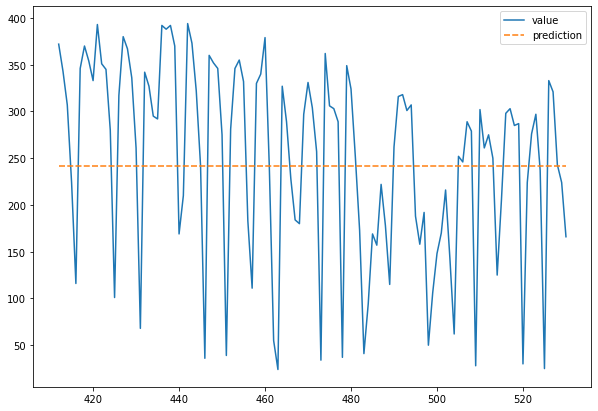

In [85]:
sn.lineplot(data = df_result)

In [86]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(np.array(X_train_bronx).reshape(-1, 1))

In [88]:
train_window = 15
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [89]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=100, output_size=1):
        super().__init__()
        self.hidden_size = hidden_size

        # Add an LSTM layer:
        self.lstm = nn.LSTM(input_size, hidden_size)

        # Add a fully connected linear layer:
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, seq):
        lstm_out, _ = self.lstm(seq.view(len(seq), 1, -1))
        return self.linear(lstm_out.view(len(seq), -1))

In [90]:
model = LSTM(input_size=X_train_bronx.shape[1], hidden_size = 5)
model = model.cuda()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
optimizer.zero_grad()
epochs = 3000

In [91]:
%%time
losses = []
for epoch in range(epochs):
    
    # Extract the sequence and label from the training data
    for seq, y_train in train_loader:

        # Reset the parameters and hidden states
        optimizer.zero_grad()

        # Predict the values
        # Add cuda to sequences
        y_pred = model(seq.cuda()).view(-1)

        # Calculate loss and perform backpropagation
        loss = criterion(y_train.cuda(), y_pred)
        loss.backward(retain_graph=True)
        optimizer.step()
        
    if epoch%50 == 0:
        print(f'epoch: {epoch+1:2} loss: {loss.item():10.8f}')
        losses.append(loss)
        

#print(f'Training took {time.time() - start_time:.0f} seconds')

epoch:  1 loss: 91158.42187500
epoch: 51 loss: 81133.14062500
epoch: 101 loss: 72308.26562500
epoch: 151 loss: 64544.17187500
epoch: 201 loss: 57717.24218750
epoch: 251 loss: 51718.04687500
epoch: 301 loss: 46449.74609375
epoch: 351 loss: 41826.60156250
epoch: 401 loss: 37772.78906250
epoch: 451 loss: 34221.24218750
epoch: 501 loss: 31112.56445312
epoch: 551 loss: 28394.26562500
epoch: 601 loss: 26019.97070312
epoch: 651 loss: 23948.62304688
epoch: 701 loss: 22143.97656250
epoch: 751 loss: 20573.98046875
epoch: 801 loss: 19210.31054688
epoch: 851 loss: 18027.93359375
epoch: 901 loss: 17004.78906250
epoch: 951 loss: 16121.38281250
epoch: 1001 loss: 15360.50781250
epoch: 1051 loss: 14707.00292969
epoch: 1101 loss: 14147.47070312
epoch: 1151 loss: 13670.11621094
epoch: 1201 loss: 13264.55078125
epoch: 1251 loss: 12921.61718750
epoch: 1301 loss: 12633.25585938
epoch: 1351 loss: 12392.34375000
epoch: 1401 loss: 12192.71875000
epoch: 1451 loss: 12028.85351562
epoch: 1501 loss: 11895.94140625

<AxesSubplot:>

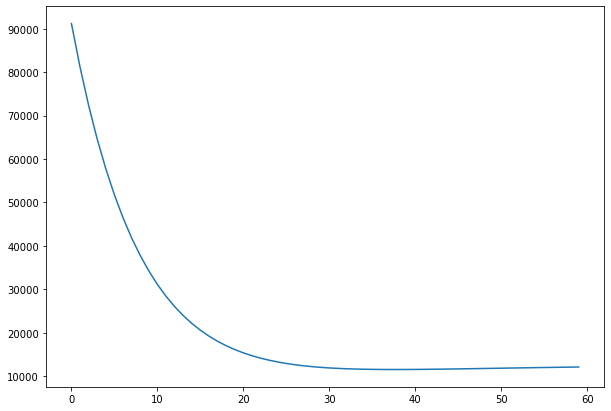

In [92]:
sn.lineplot(data = [x.detach().cpu().numpy().item() for x in losses])

In [93]:
def evaluate(model, test_loader, batch_size=1, n_features=1):
    with torch.no_grad():
        predictions = []
        values = []
        for x_test, y_test in test_loader:
            print(y_test)
            x_test = x_test.to(device)#.view([batch_size, -1, n_features]).to(device)
            y_test = y_test.to(device)
            model.eval()
            #print(x_test)
            yhat = model(x_test)
            predictions.append(yhat.detach().cpu().numpy())
            values.append(y_test.detach().cpu().numpy())
        return predictions, values

In [94]:
predictions, values = evaluate(model, test_loader, n_features = X_train_bronx.shape[1])

tensor([372., 343., 307., 224., 116., 346., 370., 354., 333., 393., 351., 345.,
        280., 101., 317., 380., 367., 336., 261.,  68., 342., 327., 295., 292.,
        392., 388., 392., 370., 169., 210., 394., 373., 322., 242.,  36., 360.,
        352., 346., 275.,  39., 281., 346., 355., 332., 183., 111., 330., 340.,
        379., 240.,  55.,  24., 327., 289., 228., 184., 180., 297., 331., 304.,
        257.,  34., 362., 306.])


In [95]:
df_result = format_predictions(predictions, values, X_test_bronx)

In [96]:
result_metrics = calculate_metrics(df_result)

In [97]:
result_metrics

{'mae': 77.36126, 'rmse': 107.3441457416286, 'r2': -0.06455117419177481}

In [98]:
df_result

value  prediction
412  372.0  306.979919
413  343.0  306.979919
414  307.0  306.979919
415  224.0  306.979919
416  116.0  306.979919
..     ...         ...
471  304.0  306.979919
472  257.0  306.979919
473   34.0  306.979919
474  362.0  306.979919
475  306.0  306.979919

[64 rows x 2 columns]

<AxesSubplot:>

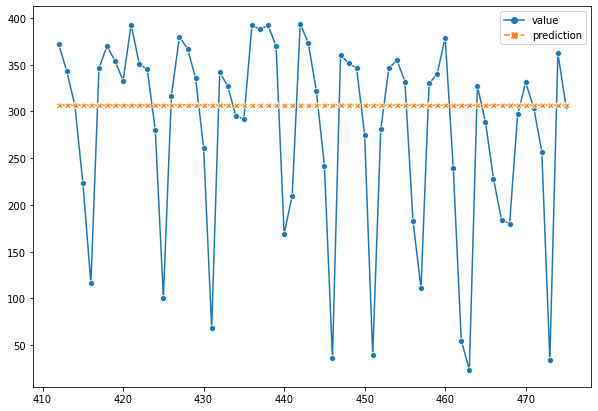

In [99]:
sn.lineplot(data = df_result, markers= True)

### Misdemeanor

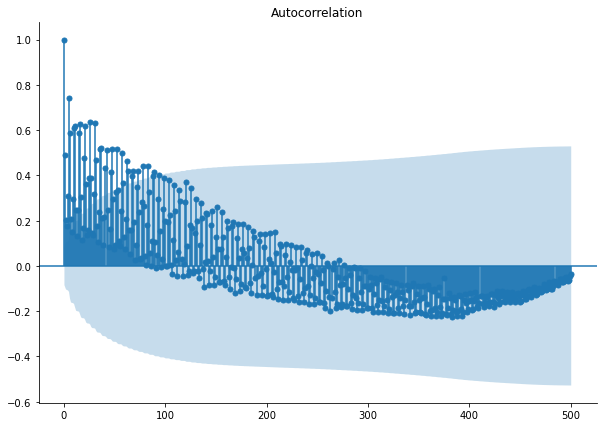

In [148]:
plot_acf(df_bronx.Misdemeanor, lags = 500)
sn.despine()

D:\ignac\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


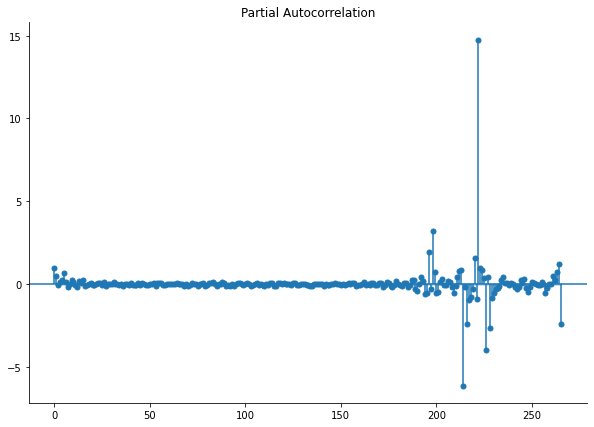

In [83]:
plot_pacf(df_bronx.Misdemeanor.dropna(), lags = 265)
sn.despine();

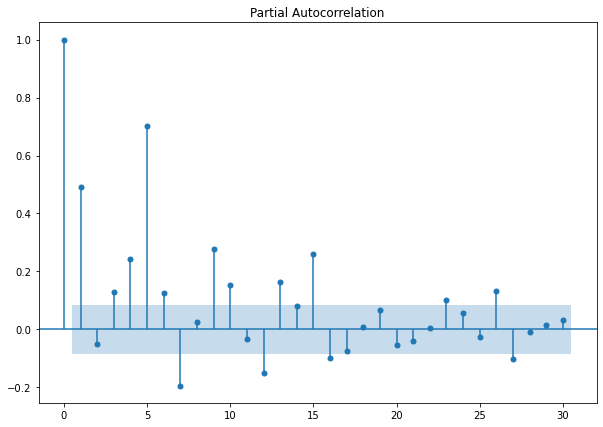

In [153]:
plot_pacf(df_bronx.Misdemeanor, lags = 30);

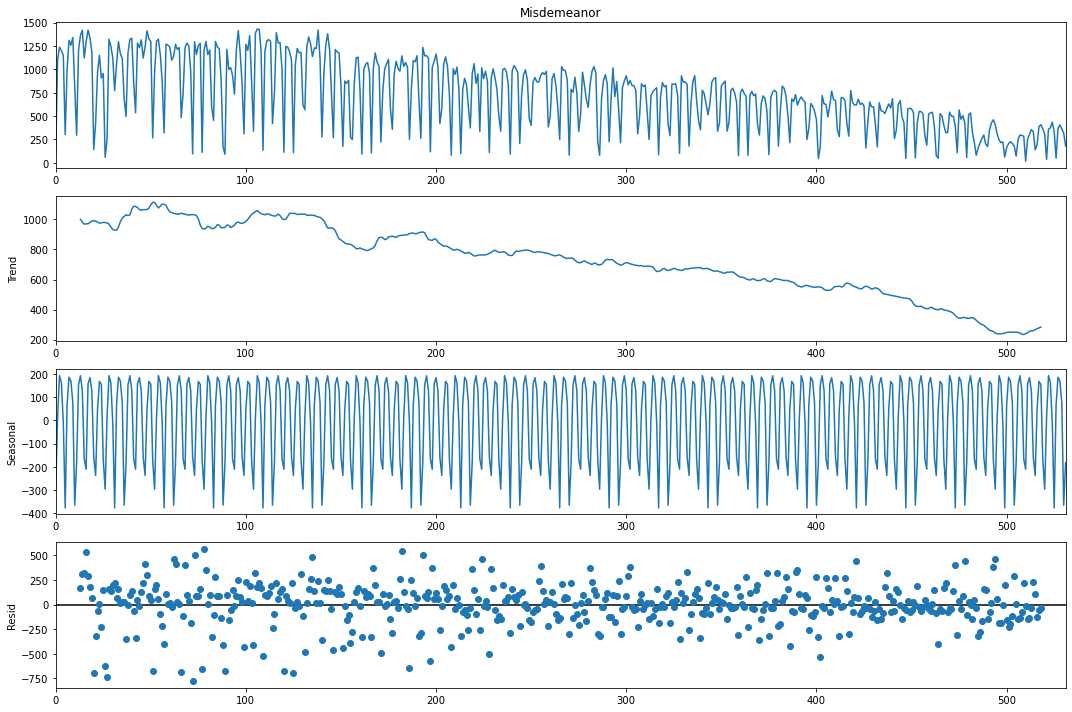

In [38]:
res = seasonal_decompose(df_bronx['Misdemeanor'], period=26)
res.plot();

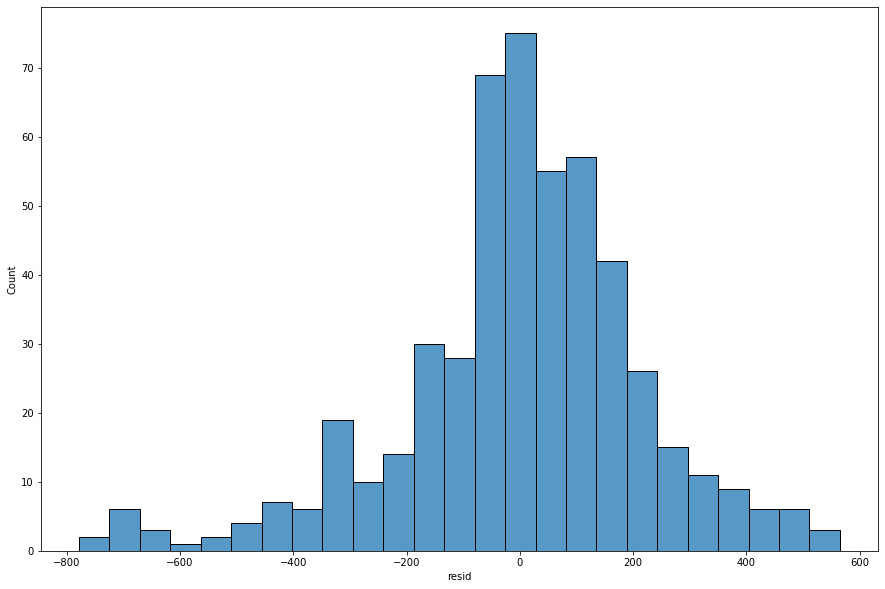

In [39]:
sn.histplot(res.resid);

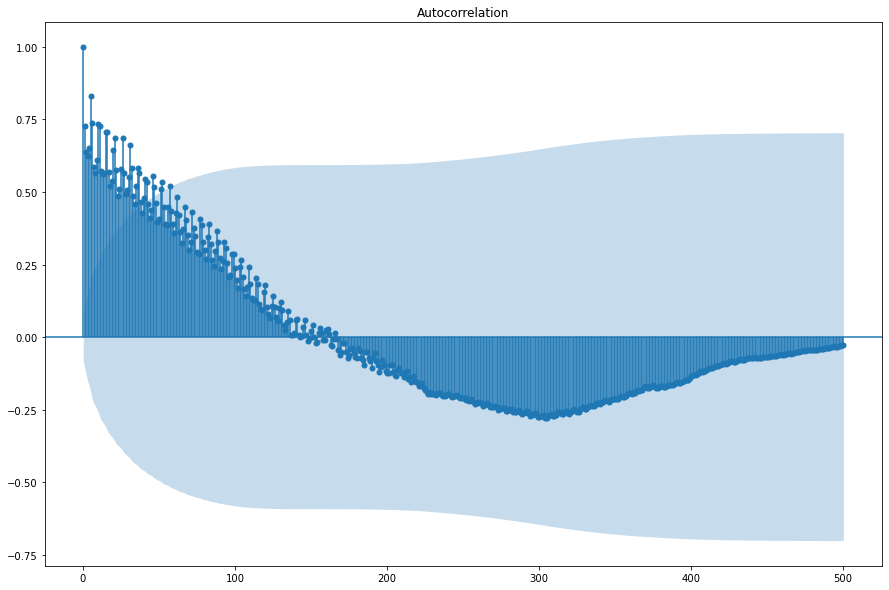

In [60]:
plot_acf(df_bronx.Violation, lags = 500);

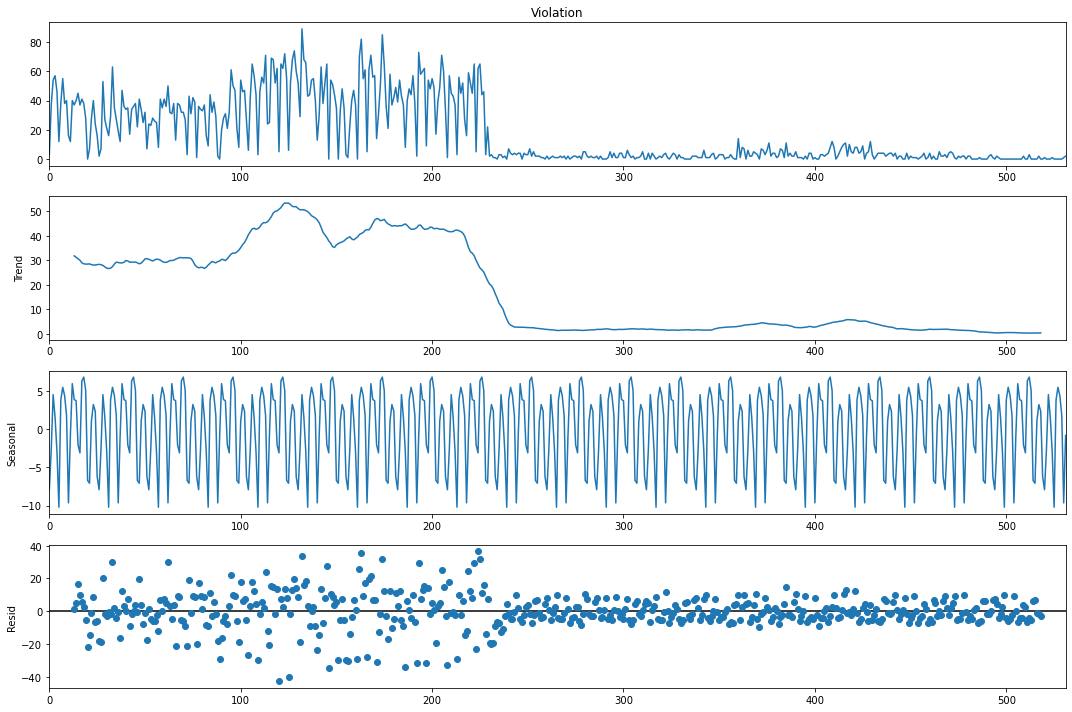

In [40]:
res = seasonal_decompose(df_bronx['Violation'], period=26)
res.plot();

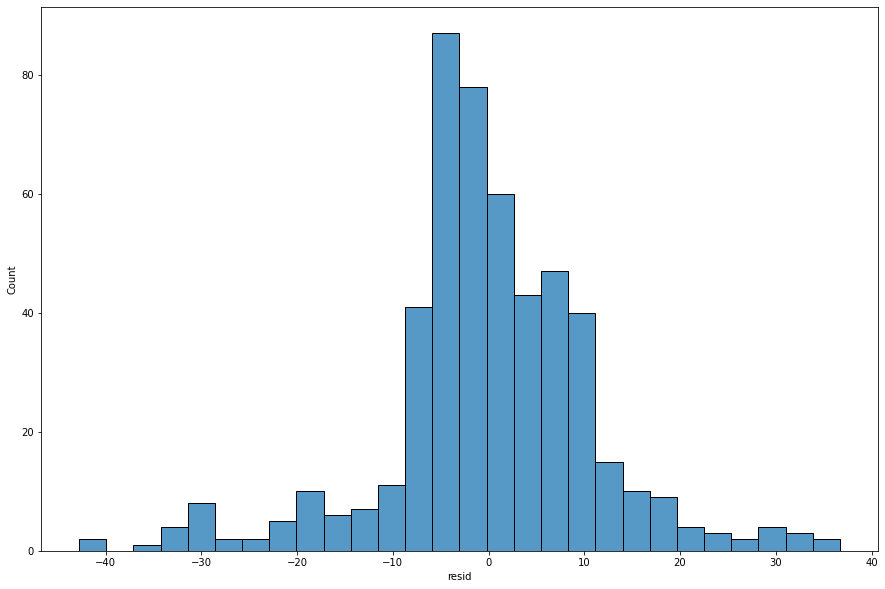

In [41]:
sn.histplot(res.resid);

## Brooklyn

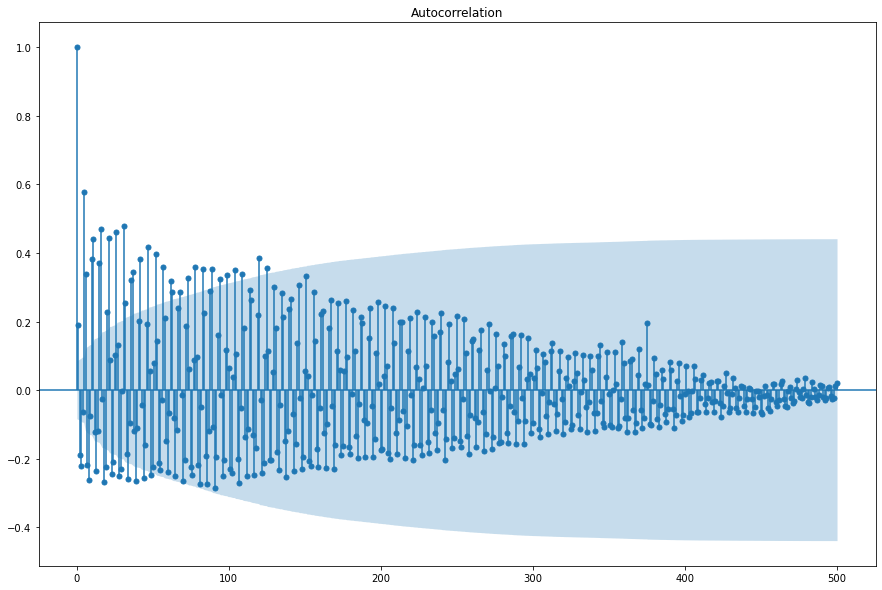

In [62]:
plot_acf(df_brooklyn.Felony, lags = 500);

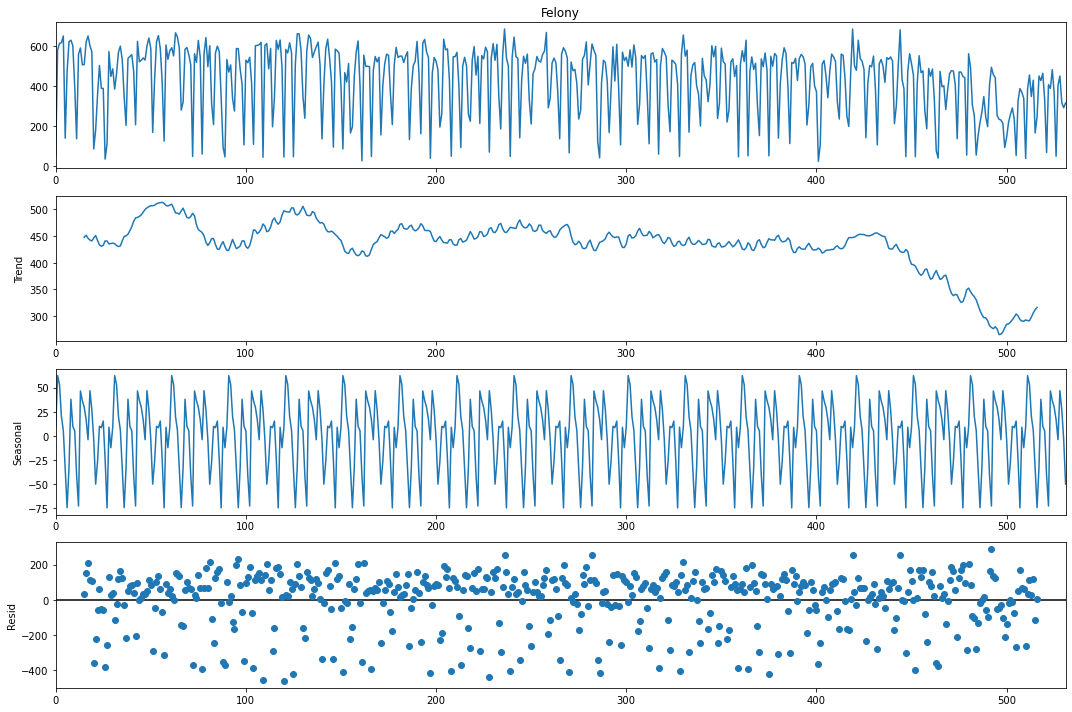

In [50]:
res = seasonal_decompose(df_brooklyn['Felony'], period=30)
res.plot();

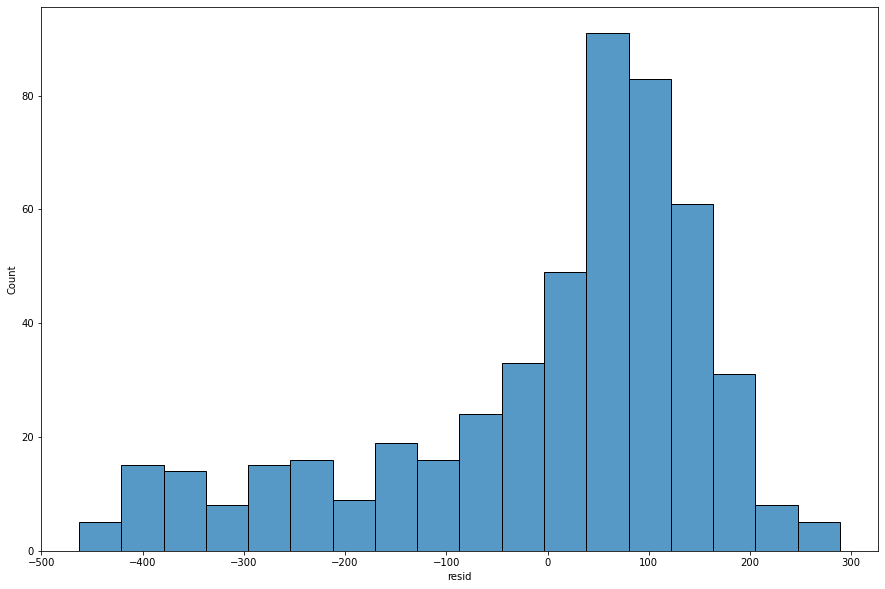

In [51]:
sn.histplot(res.resid);

## Modelación ingénua con modelos de ML 

Voy a seleccionar todos los registros de los años 2012 a 2018 como entrenamiento y el año 2019 como pruebas

In [10]:
x_train = pd.concat([df_bronx[df_bronx['year'] < 2019].drop(['Felony', 'Misdemeanor', 'Violation'], axis = 1),
           df_brooklyn[df_brooklyn['year'] < 2019].drop(['Felony', 'Misdemeanor', 'Violation'], axis = 1),
           df_manhattan[df_manhattan['year'] < 2019].drop(['Felony', 'Misdemeanor', 'Violation'], axis = 1),
           df_queens[df_queens['year'] < 2019].drop(['Felony', 'Misdemeanor', 'Violation'], axis = 1),
           df_statenIsland[df_statenIsland['year'] < 2019].drop(['Felony', 'Misdemeanor', 'Violation'], axis = 1)], ignore_index = True)

In [11]:
x_train.to_csv('x_train.csv', index = False)

In [12]:
y_train = pd.concat([df_bronx[df_bronx['year'] < 2019][['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']],
           df_brooklyn[df_brooklyn['year'] < 2019][['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']],
           df_manhattan[df_manhattan['year'] < 2019][['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']],
           df_queens[df_queens['year'] < 2019][['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']],
           df_statenIsland[df_statenIsland['year'] < 2019][['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']]], ignore_index = True)
y_train['year_week_borough'] = list(map(lambda x: f'{x[0]}_{x[1]}_{x[2]}', zip(y_train['year'], y_train['week'], y_train['Borough'])))
y_train.drop(columns = ['year', 'week', 'Borough'], inplace = True)

In [13]:
y_train

Felony  Misdemeanor  Violation      year_week_borough
0         27          102          3          2012_26_Bronx
1        382         1105         37          2012_27_Bronx
2        453         1236         54          2012_28_Bronx
3        366         1204         57          2012_29_Bronx
4        374         1146         46          2012_30_Bronx
...      ...          ...        ...                    ...
2029      16           32          0  2018_48_Staten island
2030      62          163          0  2018_49_Staten island
2031      54           93          0  2018_50_Staten island
2032      59          108          0  2018_51_Staten island
2033      44           88          0  2018_52_Staten island

[2034 rows x 4 columns]

In [14]:
y_train.to_csv('y_train.csv', index = False)

In [15]:
x_test = pd.concat([df_bronx[df_bronx['year'] == 2019].drop(['Felony', 'Misdemeanor', 'Violation'], axis = 1),
           df_brooklyn[df_brooklyn['year'] == 2019].drop(['Felony', 'Misdemeanor', 'Violation'], axis = 1),
           df_manhattan[df_manhattan['year'] == 2019].drop(['Felony', 'Misdemeanor', 'Violation'], axis = 1),
           df_queens[df_queens['year'] == 2019].drop(['Felony', 'Misdemeanor', 'Violation'], axis = 1),
           df_statenIsland[df_statenIsland['year'] == 2019].drop(['Felony', 'Misdemeanor', 'Violation'], axis = 1)], ignore_index = True)

In [16]:
x_test['year_week_borough'] = list(map(lambda x: f'{x[0]}_{x[1]}_{x[2]}', zip(x_test['year'], x_test['week'], x_test['Borough'])))
x_test.drop(columns = ['year', 'week', 'Borough'], inplace = True)
x_test

month  Housing  Other jurisdiction  Patrol  Transit  18-24  25-44  45-64  \
0        1       56                  24     762       50    194    477    176   
1        1       45                  25    1046       54    265    630    221   
2        1       46                  47     916       80    241    555    227   
3        1       40                  27     860       46    206    535    189   
4        1       30                  20     471       33    133    310     88   
..     ...      ...                 ...     ...      ...    ...    ...    ...   
305     12        0                   0       7        0      0      6      1   
306     12        0                   4     152        0     26     94     26   
307     12        0                  11     157        0     30     85     40   
308     12        0                   4     119        1     31     55     31   
309     12        0                   2      92        0     21     49     18   

     65+  <18  ...  Lost consciousness  Other vehicular  \
0      6   39  ...                   0               15   
1     16   38  ...                   0               16   
2     19   47  ...                   1               23   
3      5   38  ...                   1               16   
4      2   21  ...                   0               14   
..   ...  ...  ...                 ...              ...   
305    0    0  ...                   0                0   
306    5    5  ...                   1                1   
307    6    7  ...                   0                0   
308    1    6  ...                   0                1   
309    4    2  ...                   0                1   

     Passing or lane usage improper  Passing too closely  \
0                                 4                    8   
1                                10                   20   
2                                19                   14   
3                                 4                   12   
4                                 6                    7   
..                              ...                  ...   
305                               0                    0   
306                               1                    0   
307                               1                    1   
308                               0                    0   
309                               1                    0   

     Prescription medication  Traffic control disregarded  Turning improperly  \
0                          0                            7                  10   
1                          0                            6                   8   
2                          1                            5                  13   
3                          0                            6                   7   
4                          0                            3                   6   
..                       ...                          ...                 ...   
305                        0                            0                   0   
306                        0                            1                   1   
307                        0                            2                   0   
308                        0                            1                   0   
309                        0                            0                   2   

     Unsafe lane changing  Unspecified      year_week_borough  
0                       8           61           2019_1_Bronx  
1                       7           61           2019_2_Bronx  
2                      11           75           2019_3_Bronx  
3                       6           80           2019_4_Bronx  
4                      10           47           2019_5_Bronx  
..                    ...          ...                    ...  
305                     0            0  2019_48_Staten island  
306                     1            9  2019_49_Staten island  
307                     0            3  2019_50_State

In [17]:
# Les voy a pedir predecir desde la semana 11 en adelante para que tengan espacio para jugar con el LAG
x_test.to_csv('x_test.csv', index = False)

In [18]:
y_test = pd.concat([df_bronx[df_bronx['year'] == 2019][['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']],
           df_brooklyn[df_brooklyn['year'] == 2019][['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']],
           df_manhattan[df_manhattan['year'] == 2019][['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']],
           df_queens[df_queens['year'] == 2019][['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']],
           df_statenIsland[df_statenIsland['year'] == 2019][['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']]], ignore_index = True).iloc[10:,] # desde la semana 11
y_test.sample(10)

Felony  Misdemeanor  Violation  year  week        Borough
273      10           23          0  2019    22  Staten island
172     337          574          3  2019    42      Manhattan
110     468          538         14  2019    42       Brooklyn
112     274          295          9  2019    44       Brooklyn
128     203          392         13  2019     5      Manhattan
156     344          623         62  2019    29      Manhattan
271      89          115          2  2019    21  Staten island
228     336          452          8  2019    37         Queens
75      502          704         22  2019    12       Brooklyn
305       2            5          0  2019    48  Staten island

In [19]:
y_test['year_week_borough'] = list(map(lambda x: f'{x[0]}_{x[1]}_{x[2]}', zip(y_test['year'], y_test['week'], y_test['Borough'])))
y_test.drop(columns = ['year', 'week', 'Borough'], inplace = True)

In [20]:
y_test

Felony  Misdemeanor  Violation      year_week_borough
10      116          286          2           2019_9_Bronx
11      346          773         10          2019_10_Bronx
12      370          646          5          2019_11_Bronx
13      354          619          4          2019_12_Bronx
14      333          619          8          2019_13_Bronx
..      ...          ...        ...                    ...
305       2            5          0  2019_48_Staten island
306      54          102          0  2019_49_Staten island
307      80           88          0  2019_50_Staten island
308      53           71          0  2019_51_Staten island
309      41           52          1  2019_52_Staten island

[300 rows x 4 columns]

In [21]:
y_train.shape

(2034, 4)

In [22]:
x_train.shape

(2034, 46)

In [23]:
y_test.to_csv('y_test.csv', index = False)

Sample Submission

In [24]:
y_test['Felony'] = np.random.normal(loc = y_train.Felony.mean(), scale = y_train.Felony.std(), size = y_test.shape[0])
y_test['Misdemeanor'] = np.random.normal(loc = y_train.Misdemeanor.mean(), scale = y_train.Misdemeanor.std(), size = y_test.shape[0])
y_test['Violation'] = np.random.normal(loc = y_train.Violation.mean(), scale = y_train.Violation.std(), size = y_test.shape[0])

In [25]:
y_test.to_csv('sample_submission.csv', index = False)

In [26]:
y_test['Felony'] = np.nan
y_test['Misdemeanor'] = np.nan
y_test['Violation'] = np.nan

In [27]:
y_test.to_csv('y_test_pattern.csv', index = False)

### Bronx

In [28]:
df_bronx.columns

Index(['year', 'month', 'week', 'Borough', 'Felony', 'Misdemeanor',
       'Violation', 'Housing', 'Other jurisdiction', 'Patrol', 'Transit',
       '18-24', '25-44', '45-64', '65+', '<18', 'Unknown', 'Female', 'Male',
       'American indian/alaskan native', 'Asian / pacific islander', 'Black',
       'Black hispanic', 'Other', 'Unknown.1', 'White', 'White hispanic',
       'Animal abuse', 'Domestic', 'Drug_&_Violence', 'Noise',
       'Traffic_related', 'Number_of_persons_injured',
       'Number_of_persons_killed', 'Backing unsafely',
       'Driver inattention/distraction', 'Driver inexperience',
       'Failure to yield right-of-way', 'Fatigued/drowsy',
       'Following too closely', 'Lost consciousness', 'Other vehicular',
       'Passing or lane usage improper', 'Passing too closely',
       'Prescription medication', 'Traffic control disregarded',
       'Turning improperly', 'Unsafe lane changing', 'Unspecified'],
      dtype='object')

In [29]:
X_train_bronx = buildLaggedFeatures(df_bronx[df_bronx['year'] <= 2018].drop(columns = ['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']), lag = 10, dropna = True).iloc[:-1,:]
X_test_bronx = buildLaggedFeatures(df_bronx[df_bronx['year'] == 2019].drop(columns = ['Felony', 'Misdemeanor', 'Violation', 'year', 'week', 'Borough']), lag = 10, dropna = True).iloc[:-1,:]
y_train_bronx = df_bronx[df_bronx['year'] <= 2018][['Felony', 'Misdemeanor', 'Violation']].iloc[10+1:,:]
y_test_bronx = df_bronx[df_bronx['year'] == 2019][['Felony', 'Misdemeanor', 'Violation']].iloc[10+1:,:]

In [30]:
y_test_bronx

Felony  Misdemeanor  Violation
418     346          773         10
419     370          646          5
420     354          619          4
421     333          619          8
422     393          681          8
423     351          625          4
424     345          639          5
425     280          609          9
426     101          159          0
427     317          438          4
428     380          652          5
429     367          598         12
430     336          600          3
431     261          409          0
432      68          171          2
433     342          643          4
434     327          557          4
435     295          550          4
436     292          527          4
437     392          581          2
438     388          630          3
439     392          587          4
440     370          686          4
441     169          259          2
442     210          352          4
443     394          625          0
444     373          665          2
445     322          491          2
446     242          429          0
447      36           47          0
448     360          577          4
449     352          584          0
450     346          577          2
451     275          537          1
452      39           52          1
453     281          425          1
454     346          551          0
455     355          548          1
456     332          523          2
457     183          292          4
458     111          189          0
459     330          522          1
460     340          535          4
461     379          541          0
462     240          389          2
463      55           78          0
464      24           49          0
465     327          526          5
466     289          499          2
467     228          400          2
468     184          324          3

In [31]:
y_train_bronx.shape

(396, 3)

In [32]:
X_train_bronx.shape

(396, 473)

In [33]:
df_bronx[df_bronx['year'] == 2019].iloc[LAG:,:].shape

(59, 49)

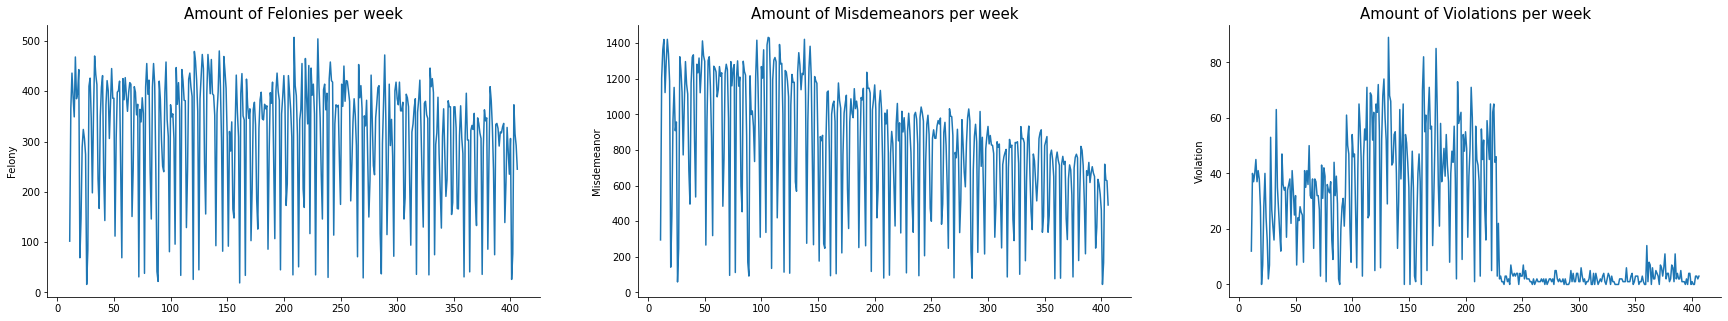

In [36]:
fig,_ = plt.subplots(figsize = (30,5))
plt.subplot(1,3,1)
sn.lineplot(x = y_train_bronx.index, y = 'Felony', data = y_train_bronx);
sn.despine()
plt.title('Amount of Felonies per week', size = 15)

plt.subplot(1,3,2)
sn.lineplot(x = y_train_bronx.index, y = 'Misdemeanor', data = y_train_bronx);
sn.despine()
plt.title('Amount of Misdemeanors per week', size = 15)

plt.subplot(1,3,3)
sn.lineplot(x = y_train_bronx.index, y = 'Violation', data = y_train_bronx);
sn.despine()
plt.title('Amount of Violations per week', size = 15);




In [ ]:
rf_bronx = RandomForestRegressor(n_estimators = 50).fit(X_train_bronx, y_train_bronx)
svm_bronx = RegressorChain(SVR(kernel = 'linear')).fit(X_train_bronx, y_train_bronx)

In [195]:
rf_preds = rf_bronx.predict(X_test_bronx)
svm_preds = svm_bronx.predict(X_test_bronx)

In [196]:
mae_bronx_svm = mean_absolute_error(y_test_bronx, svm_preds, multioutput='raw_values')
mse_bronx_svm = mean_squared_error(y_test_bronx, svm_preds, multioutput='raw_values')

mae_bronx_rf = mean_absolute_error(y_test_bronx, rf_preds, multioutput='raw_values')
mse_bronx_rf = mean_squared_error(y_test_bronx, rf_preds, multioutput='raw_values')

print('SVM')
for i, target_name in enumerate(y_train_bronx.columns):
    print(f'\t\t{target_name}')
    print(f'MAE Bronx {target_name}: {mae_bronx_svm[i]}')
    print(f'MSE Bronx {target_name}: {mse_bronx_svm[i]}')
print('\n#########################\n')
    
print('RandomForest')
for i, target_name in enumerate(y_train_bronx.columns):
    print(f'\t\t{target_name}')
    print(f'MAE Bronx {target_name}: {mae_bronx_rf[i]}')
    print(f'MSE Bronx {target_name}: {mse_bronx_rf[i]}')
#    print('\n#########################\n')

SVM
		Felony
MAE Bronx Felony: 63.18386476793747
MSE Bronx Felony: 6312.745911123962
		Misdemeanor
MAE Bronx Misdemeanor: 82.9296792234525
MSE Bronx Misdemeanor: 11330.958594937321
		Violation
MAE Bronx Violation: 14.489728245205091
MSE Bronx Violation: 329.3188851359069

#########################

RandomForest
		Felony
MAE Bronx Felony: 37.19541666666667
MSE Bronx Felony: 2027.2869916666668
		Misdemeanor
MAE Bronx Misdemeanor: 100.70041666666664
MSE Bronx Misdemeanor: 14983.435891666662
		Violation
MAE Bronx Violation: 2.2500000000000004
MSE Bronx Violation: 9.788200000000002


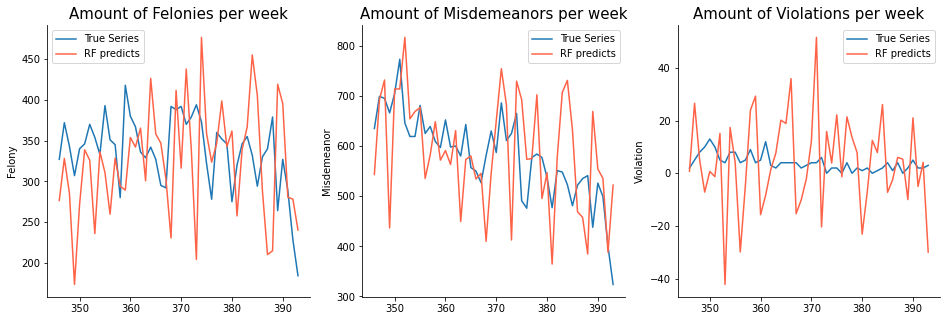

In [197]:
fig,_ = plt.subplots(figsize = (16,5))
plt.subplot(1,3,1)
sn.lineplot(x = y_test_bronx.index, y = y_test_bronx['Felony'], label = 'True Series');
sn.lineplot(x = y_test_bronx.index, y = svm_preds[:, 0], color = 'tomato', label = 'RF predicts');
sn.despine()
plt.title('Amount of Felonies per week', size = 15)

plt.subplot(1,3,2)
sn.lineplot(x = y_test_bronx.index, y = y_test_bronx['Misdemeanor'], label = 'True Series');
sn.lineplot(x = y_test_bronx.index, y = svm_preds[:, 1], color = 'tomato', label = 'RF predicts');
sn.despine()
plt.title('Amount of Misdemeanors per week', size = 15)

plt.subplot(1,3,3)
sn.lineplot(x = y_test_bronx.index, y = y_test_bronx['Violation'], label = 'True Series');
sn.lineplot(x = y_test_bronx.index, y = svm_preds[:, 2], color = 'tomato', label = 'RF predicts');
sn.despine()
plt.title('Amount of Violations per week', size = 15);


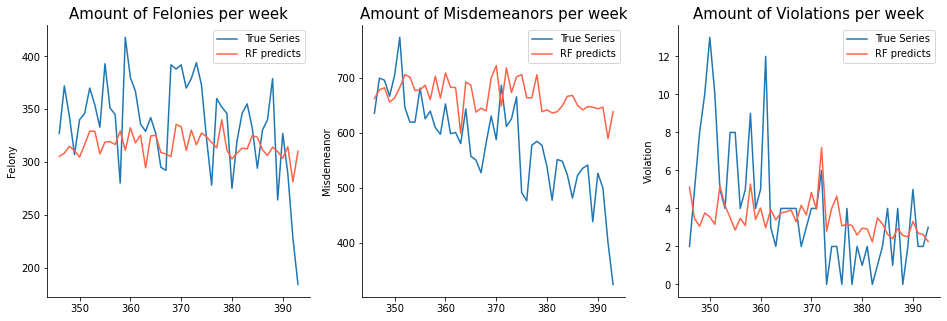

In [189]:
fig,_ = plt.subplots(figsize = (16,5))
plt.subplot(1,3,1)
sn.lineplot(x = y_test_bronx.index, y = y_test_bronx['Felony'], label = 'True Series');
sn.lineplot(x = y_test_bronx.index, y = rf_preds[:, 0], color = 'tomato', label = 'RF predicts');
sn.despine()
plt.title('Amount of Felonies per week', size = 15)

plt.subplot(1,3,2)
sn.lineplot(x = y_test_bronx.index, y = y_test_bronx['Misdemeanor'], label = 'True Series');
sn.lineplot(x = y_test_bronx.index, y = rf_preds[:, 1], color = 'tomato', label = 'RF predicts');
sn.despine()
plt.title('Amount of Misdemeanors per week', size = 15)

plt.subplot(1,3,3)
sn.lineplot(x = y_test_bronx.index, y = y_test_bronx['Violation'], label = 'True Series');
sn.lineplot(x = y_test_bronx.index, y = rf_preds[:, 2], color = 'tomato', label = 'RF predicts');
sn.despine()
plt.title('Amount of Violations per week', size = 15);

Ahora basta ajustar hiperparámetros, analizar los resultados y repetir el procedimiento para los demás municipios...